# Análisis de negocios

## Contexto

Por mi desempeño en el curso de Análisis de Datos de TripleTen, me han ofrecido hacer prácticas en el departamento analítico de *Y.Afisha*. Mi primera tarea es ayudar a optimizar los gastos de marketing.

Para ello cuento con la siguente: información:

- registros del servidor con datos sobre las visitas a *Y.Afisha* desde enero de 2017 hasta diciembre de 2018;
- un archivo con los pedidos en este periodo;
- estadísticas de gastos de marketing.

Con base a la información suministrada tengo que investigar:
- cómo los clientes usan el servicio;
- cuándo empiezan a comprar;
- cuánto dinero aporta cada cliente a la compañía;
- cuándo los ingresos cubren el costo de adquisición de los clientes.

Bueno, iniciemos!

## Paso 1. Descarga los datos y prepáralos para el análisis

Se inicia con la carga de los conjuntos de datos, y la exploración inicial de los mismos. Las herramientas a utilizar son:

- Importación de librerías a utilizar.
- Lectura de los archivo de datos, y creación de las variables.
- Exploración inicial, se utilizan las siguientes herramientas para obtener información acerca del dataset:
    * `'sample()'`: para obetner una muestra aleatoria de los datos.
    * `'info()'`: para obtener una descripción general del dataset.
    * `'dtypes'`: para obterner información acerca del tipo de datos de las columnas del dataset.
    * `'describe()'`: para revisar valores de tipo numérico.

### Importación de librerías

In [1]:
# Se cargan todas la librerías
import pandas as pd
import numpy as np
import math as mt
import datetime as dt
import plotly.express as px
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

### Lectura de archivos de datos

In [2]:
visits = pd.read_csv('visits_log_us.csv')
orders = pd.read_csv('orders_log_us.csv')
costs_marketing = pd.read_csv('costs_us.csv')

### Exploración inicial de los datasets

#### Dataset `'visits_log_us.csv'`

In [3]:
# Se imprime una muestras de los registros del dataset
print("-- Una muestra de los datos del dataset 'visits_log_us.csv': \n")
print(visits.sample(n= 5))
print()

# Se lee la infomación general del dataset
print("-- Información general del dataset 'visits_log_us.csv': \n")
visits.info()
print()

# Se validan los tipos de datos de las columnas
print("-- Tipos de datos del dataset 'visits_log_us.csv': \n")
print(visits.dtypes)
print()

print("-- Se muestra información general acerca de los datos numéricos del dataset:\n")
print(visits.describe())

-- Una muestra de los datos del dataset 'visits_log_us.csv': 

         Device               End Ts  Source Id             Start Ts  \
308359  desktop  2018-03-20 23:17:00          2  2018-03-20 22:57:00   
275186  desktop  2017-09-19 14:10:00          2  2017-09-19 13:43:00   
239074    touch  2017-10-07 08:34:00          9  2017-10-07 08:07:00   
120593  desktop  2017-12-31 14:37:00          3  2017-12-31 13:59:00   
266978  desktop  2017-09-13 23:00:00          3  2017-09-13 22:59:00   

                         Uid  
308359  11170707551818129377  
275186   1375648590224936376  
239074  14794663001435677714  
120593   7032767208794422666  
266978    465886283160987125  

-- Información general del dataset 'visits_log_us.csv': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-nu

##### Hallazgos dataset `'visits_log_us.csv'`

Luego de la exploración inicial del dataset se encontró lo siguiente:

- No se encontraron datos ausentes en el dataset.
- Es necesario normalizar los nombres de las columnas del dataset. Se utilizará el formato *snake_case* y todos los carácteres en minúsculas.
- Hay que corregir los tipos de datos para las siguientes columnas:
    - `'Device'`: deber ser de tipo `'category'`
    - `'End Ts'` y `'Start Ts'` deben ser de tipo `'datetime'`

#### Dataset `'orders_log_us.csv'`

In [4]:
# Se imprime una muestras de los registros del dataset
print("-- Una muestra de los datos del dataset 'orders_log_us.csv': \n")
print(orders.sample(n= 5))
print()

# Se lee la infomación general del dataset
print("-- Información general del dataset 'orders_log_us.csv': \n")
orders.info()
print()

# Se validan los tipos de datos de las columnas
print("-- Tipos de datos del dataset 'orders_log_us.csv': \n")
print(orders.dtypes)
print()

print("-- Se muestra información general acerca de los datos numéricos del dataset:\n")
print(orders.describe())

-- Una muestra de los datos del dataset 'orders_log_us.csv': 

                    Buy Ts  Revenue                   Uid
7997   2017-09-16 19:18:00     6.11  13637739528430394806
42191  2018-03-26 22:04:00     6.11  17361765569644591690
11062  2017-10-06 12:06:00    14.67  15046505774730997362
11175  2017-10-06 16:24:00     4.89   2761745439417630465
5787   2017-08-22 13:51:00     6.11  15253354780141134937

-- Información general del dataset 'orders_log_us.csv': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

-- Tipos de datos del dataset 'orders_log_us.csv': 

Buy Ts      object
Revenue    float64
Uid         uint64
dtype: object

-- Se muestra información general acerca de

##### Hallazgos dataset `'orders_log_us.csv'`

Luego de la exploración inicial del dataset se encontró lo siguiente:

- No se encontraron datos ausentes en el dataset.
- Es necesario normalizar los nombres de las columnas del dataset. Se utilizará el formato *snake_case* y todos los carácteres en minúsculas.
- Hay que corregir el tipo de datos para la columna:
    - `'Buy Ts'`: debe ser de tipo `'datetime'`

#### Dataset `'costs_us.csv'`

In [5]:
# Se imprime una muestras de los registros del dataset
print("-- Una muestra de los datos del dataset 'costs_us.csv': \n")
print(costs_marketing.sample(n= 5))
print()

# Se lee la infomación general del dataset
print("-- Información general del dataset 'costs_log_us.csv': \n")
costs_marketing.info()
print()

# Se validan los tipos de datos de las columnas
print("-- Tipos de datos del dataset 'costs_log_us.csv': \n")
print(costs_marketing.dtypes)
print()

print("-- Se muestra información general acerca de los datos numéricos del dataset:\n")
print(costs_marketing.describe())

-- Una muestra de los datos del dataset 'costs_us.csv': 

      source_id          dt   costs
2290         10  2017-09-20   18.89
527           2  2017-11-12  119.54
1822          9  2017-06-07    8.58
1643          5  2017-12-09  164.53
519           2  2017-11-04  134.45

-- Información general del dataset 'costs_log_us.csv': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

-- Tipos de datos del dataset 'costs_log_us.csv': 

source_id      int64
dt            object
costs        float64
dtype: object

-- Se muestra información general acerca de los datos numéricos del dataset:

         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.4

##### Hallazgos dataset `'costs_us.csv'`

Luego de la exploración inicial del dataset se encontró lo siguiente:

- No se encontraron datos ausentes en el dataset.
- No se requiere normalizar los nombres de las columnas del dataset.
- Hay que corregir el tipo de datos para la columna:
    - `'dt'`: debe ser de tipo `'datetime'`

### Valores duplicados

Se valida si en los datasets existen valores duplicados.

In [6]:
# Se valida si existen filas duplicadas en cada dataset.
duplicated_visits = visits.duplicated().sum()
print(f"-- Total de filas duplicadas en el dataset 'visits_log_us.csv': {duplicated_visits}")
print()

# Se cuenta la cantidad de users ids únicos
print(f"-- Cantidad de users ids únicos: {visits['Uid'].nunique()}")
print()

# Se imprime los diferentes valores de la columna 'Device' del dataset 'visits'
print(f"-- Valores únicos de la columna 'Device' del dataset 'visits': {visits['Device'].unique()}")
print()

duplicated_orders = orders.duplicated().sum()
print(f"-- Total de filas duplicadas en el dataset 'orders_log_us.csv': {duplicated_orders}")
print()

duplicated_costs_marketing = costs_marketing.duplicated().sum()
print(f"-- Total de filas duplicadas en el dataset 'costs_us.csv': {duplicated_costs_marketing}")

-- Total de filas duplicadas en el dataset 'visits_log_us.csv': 0

-- Cantidad de users ids únicos: 228169

-- Valores únicos de la columna 'Device' del dataset 'visits': ['touch' 'desktop']

-- Total de filas duplicadas en el dataset 'orders_log_us.csv': 0

-- Total de filas duplicadas en el dataset 'costs_us.csv': 0


##### Hallazgos

- No se encuentran registros duplicados en los datasets.
- También se validó los valores de la columna `'Device'` del dataset `'visits'` y no se econtraron valos duplicados por motivos de errores de tipeo.

### Preparar los datos

En esta parte se realizará la depuración de los datos, se trabajará en lo siguiente:

- En el dataset `'visits_log_us.csv'` se cambiarán los tipos de datos de las columnas `'End Ts'` y `'Start Ts'`, de `object` a `datetime`.
También se cambiará el tipo de de dato de la columna `'Device'` de tipo `object` a `'category'`.
- En el dataset  `'orders_log_us.csv'` también se cambiará el tipo de datos de la columna `'Buy Ts'` de `object` a `datetime`.
- En el dataset `'costs_us.csv'` se cambiará el tipo de datos de la columna `dt` de `object` a `datetime`.
- Y por último se normalizará el nombre de las columnas de los datasets `'visits_log_us.csv'` y `'orders_log_us.csv'`.

#### Tipos de datos

In [7]:
# Se realiza la conversión del tipo de datos de las columnas 'Device', 'End Ts' y 'Start Ts' en el dataset  'visits_log_us.csv'
visits['Device'] = visits['Device'].astype('category')
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format='%Y-%m-%d %H:%M:%S')
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format='%Y-%m-%d %H:%M:%S')
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format='%Y-%m-%d %H:%M:%S')

# Se valida que la operación se halla realizado correctamente
print("-- Información general del dataset 'visits_log_us.csv'': \n")
visits.info()
print()
orders.info()

# Se imprime una muestras de los registros del dataset
print("-- Una muestra de los datos de los datasets 'visits_log_us.csv' y 'orders': \n")
print(visits.head())
print()
print(orders.head())

-- Información general del dataset 'visits_log_us.csv'': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
-- Una mu

#### Normalización de los nombres de las columnas
Se normalizará el nombre de las columnas de los datasets  `'visits_log_us.csv'` y `'orders_log_us.csv'`.

Se pasarán al formato *snake_case*, y todos los carácteres a minúsculas.

In [8]:
# Se crea una función para realizar el cambio de formato de los nombres de las columnas de los datasets
def format_cols(df):
    """Esta función toma un dataframe como argumento. Para cada uno de los nombres de las columnas del dataframe, normaliza el nombre
    de cada una de ellas; cambiando los espacios por guiones bajos, y convirtiendo todos los carácteres en minúsculas."""
    new_col_name = []
    for col in df.columns:
        new_col_name.append(col.replace(' ', '_').lower()) 
    df.columns = new_col_name


format_cols(visits)
visits.info()
print()
format_cols(orders)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


## Paso 2. Haz informes y calcula métricas

### 1. Visitas:

- ¿Cuántas personas lo usan cada día, semana y mes?
- ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
- ¿Cuál es la duración de cada sesión?
- ¿Con qué frecuencia los usuarios y las usuarias regresan?

#### ¿Cuántas personas lo usan cada día, semana y mes?

Para tratar de responder esta pregunta, se calcula el número de visitas únicas que tiene el servicio. Para ello, se hace uso de las siguientes métricas: **DAU**, **WAU** y **MAU**.

In [9]:
# Se crean columnas para el día, semana, mes y año de cada sessión iniciada por los usuarios, a partir de los datos
# de la columna 'start_t'
visits['visits_year'] = visits['start_ts'].dt.year
visits['visits_month'] = visits['start_ts'].dt.month
visits['visits_week'] = visits['start_ts'].dt.isocalendar().week
visits['visits_date'] = visits['start_ts'].dt.date

# Se valida que las columnas se hayan creado correctamente.
print(visits.head())
print()

# Se calculan las métricas de las sesiones de usuarios por día, semana y mes
dau = visits.groupby('visits_date').agg({'uid': 'nunique'}).mean()
wau = visits.groupby(['visits_year', 'visits_week']).agg({'uid': 'nunique'}).mean()
mau = visits.groupby(['visits_year', 'visits_month']).agg({'uid': 'nunique'}).mean()

print(f"-- El promedio de usarios activos por día es: {int(dau.iloc[0])}")
print(f"-- El promedio de usarios activos por semana es: {int(wau.iloc[0])}")
print(f"-- El promedio de usarios activos por año es: {int(mau.iloc[0])}")



    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  visits_year  visits_month  visits_week visits_date  
0  16879256277535980062         2017            12           51  2017-12-20  
1    104060357244891740         2018             2            8  2018-02-19  
2   7459035603376831527         2017             7           26  2017-07-01  
3  16174680259334210214         2018             5           20  2018-05-20  
4   9969694820036681168         2017            12           52  2017-12-27  

-- El promedio de usarios activos por día es: 907
-- El promedio de usarios activos por semana es: 5716
-- El promedio de usarios activos po

##### Variación en el tiempo de la cantidad de usuarios
- Se gneran gráficos para ver representar de forma visual cómo es la evolucióñ del número de usuario en el servicio.
- Para representar la evolución diaria se decide crear un histograma.
- Para representar le evolucvión semanal se utiliza un gráfico de líneas, esot nos ayuda a ver la tendencia durante todo el año.
- Para representar la evolución mensual, y la variación anual, se opta por gráficos de barras.

In [20]:
# Se calculan las métricas de las sesiones de usuarios por día, semana y mes
dau_ = visits.groupby('visits_date').agg({'uid': 'nunique'}).reset_index()

wau_ = visits.groupby(['visits_year', 'visits_week']).agg({'uid': 'nunique'}).reset_index()
print(wau_.head())


mau_ = visits.groupby(['visits_year', 'visits_month']).agg({'uid': 'nunique'}).reset_index()
mau_['visits_month'] = mau_['visits_month'].astype('str')

yau_ = visits.groupby(['visits_year']).agg({'uid': 'nunique'}).reset_index()
yau_['visits_year'] = yau_['visits_year'].astype('str')


# Evolución del número de usuarios diario
fig_day = px.line(dau_, x = 'visits_date', y = 'uid',
              title = "Evolución diaria del número de usuario",
              labels = {'visits_date': 'Dia', 'uid':'Número de usuarios'},
              markers = True
              #color = 'visits_year',
              #symbol = 'visits_year'
              )
fig_day.update_traces(textposition = "top center")
fig_day.show()

hist = px.histogram(x = dau_['uid'],
                nbins = 150,
                title = 'Distribución del número de usuarios',
                labels = {'x': 'Número de usuarios', 'y': 'Frecuencia'}
                )
hist.show()

# Se crea un grífico de cajas para ver mejor la disitrbución de los usuarios diarios
box_user_daily = px.box(x = dau_['uid'], notched=True,
                title = 'Distribución del número de usuarios diario.', points = 'all',
                labels = {'x': 'Número de usuarios'})
box_user_daily.show()

# Evolución del número de usuarios durante las semanas del año
weeks_2017 = px.line(wau_[wau_['visits_year'] == 2017], x = 'visits_week', y = 'uid',
            title = "Evolución semanal del número de usuario año 2017",
            labels = {'visits_week': 'Semanas', 'uid':'Número de usuarios'},
            markers = True)
weeks_2017.show()

weeks_2018 = px.line(wau_[wau_['visits_year'] == 2018], x = 'visits_week', y = 'uid',
            title = "Evolución semanal del número de usuario año 2018",
            labels = {'visits_week': 'Semanas', 'uid':'Número de usuarios'},
            markers = True)
weeks_2018.show()

# Distribución del número de usuarios por mes
mau_bars_2017 = px.bar(mau_[mau_['visits_year'] == 2017],
                     x = 'visits_month',
                     y = 'uid',
                     color = 'visits_month',
                     title = 'Evolución de usuarios por mes año 2017',
                     labels = {'visits_month': 'Mes', 'uid': 'Número de usuarios'}
                         )
#mau_bars_2017.update_xaxes(type='category')
mau_bars_2017.show()

mau_bars_2018 = px.bar(mau_[mau_['visits_year'] == 2018],
                     x = 'visits_month',
                     y = 'uid',
                     color = 'visits_month',
                     title = 'Evolución de usuarios por mes año 2018',
                     labels = {'visits_month': 'Mes', 'uid': 'Número de usuarios'}
                         )

mau_bars_2018.show()

# Distribución del número de usuarios por año
yau_bars = px.bar(yau_,
                     x = 'visits_year',
                     y = 'uid',
                     color = 'visits_year',
                     title = 'Evolución de usuarios por año',
                     labels = {'visits_year': 'Año', 'uid': 'Número de usuarios'}
                         )

yau_bars.show()


   visits_year  visits_week   uid
0         2017           22  2021
1         2017           23  4129
2         2017           24  2812
3         2017           25  2878
4         2017           26  3064


##### Conclusiones
- El número de usuarios diarios en el servicio tiene una distribucíon normal.
- El número de usuarios tiene un comportamiento estacional. Tiende a ser mayor el número de usuarios para fin de año.

#### ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
Vamos a determinar el número de sesiones de usuario por día. Esta métrica es un buen indicador de la frecuencia de uso de la aplicación.

In [21]:
# Se crea una variable llamada 'session_per_user_daily' para almacenar la información acerca del número de 
# sesiones por usuario por día. Esta se calcula agrupando el dataset 'visits' por la columna 'visits_date'
# y se cuenta el número de sesiones por usuario y el número de usuarios únicos para cada día.
sessions_user_per_day = visits.groupby('visits_date').agg({'uid': ['count', 'nunique']}).reset_index()
sessions_user_per_day.columns = ['visits_date', 'num_sessions', 'num_users']

sessions_user_per_day['sessions_per_user'] = sessions_user_per_day['num_sessions'] / sessions_user_per_day['num_users']

print(sessions_user_per_day.head())
print()
print(f"-- Sesiones promedio por usuario por día es: {sessions_user_per_day['sessions_per_user'].mean()}")
print()

avg_session_per_day = visits.groupby('visits_date').agg({'uid': 'count'}).mean()
print(f"-- Promedio de sesiones por día es: {int(avg_session_per_day.iloc[0])}")

  visits_date  num_sessions  num_users  sessions_per_user
0  2017-06-01           664        605           1.097521
1  2017-06-02           658        608           1.082237
2  2017-06-03           477        445           1.071910
3  2017-06-04           510        476           1.071429
4  2017-06-05           893        820           1.089024

-- Sesiones promedio por usuario por día es: 1.082169644003972

-- Promedio de sesiones por día es: 987


#####  Variación del número de  sesiones

In [23]:
# Evolución del número de sesiones por usuarios diario
# Se grafica la distribución del número de sessiones por usuario
fig_ses = px.line(sessions_user_per_day, x = 'visits_date', y = 'sessions_per_user',
              title = "Evolución diaria del número de sessiones por usuario",
              labels = {'visits_date': 'Fecha', 'session_per_user':'Número de sesiones por usuarios'},
              markers = True
              #color = 'visits_year',
              #symbol = 'visits_year'
              )
fig_ses.show()

hist_ses = px.histogram(x = sessions_user_per_day['sessions_per_user'],
                nbins = 100,
                title = 'Distribución diaria del número de sesiones por usuario',
                labels = {'x': 'Número de sesiones por usuarios', 'y': 'Frecuencia'}
                )
hist_ses.show()

# Se crea un grífico de cajas para ver mejor la disitrbución de los usuarios diarios
box_ses_daily = px.box(x = sessions_user_per_day['sessions_per_user'], notched=True,
                title = 'Distribución del número de sesiones por usuarios diario.', points = 'all',
                labels = {'x': 'Número de sesiones por usuario'})
box_ses_daily.show()

# Se encuentra el número de sesiones por semana
ses_per_week = visits.groupby(['visits_year', 'visits_week']).agg({'uid': ['count', 'nunique']}).reset_index()
ses_per_week.columns = ['visits_year', 'visits_week', 'num_sessions', 'num_users']

# Evolución del número de usuarios durante las semanas del año
ses_week_2017 = px.line(ses_per_week[ses_per_week['visits_year'] == 2017], x = 'visits_week', y = 'num_sessions',
              title = "Evolución semanal del número de sesiones de usuario año 2017",
              labels = {'visits_week': 'Semanas', 'uid':'Número de sesioness'},
              markers = True,
              color = 'visits_year',
              symbol = 'visits_year'
              )
ses_week_2017.show()

ses_week_2018 = px.line(ses_per_week[ses_per_week['visits_year'] == 2018], x = 'visits_week', y = 'num_sessions',
              title = "Evolución semanal del número de sesiones de usuario año 2018",
              labels = {'visits_week': 'Semanas', 'uid':'Número de sesioness'},
              markers = True,
              color = 'visits_year',
              symbol = 'visits_year'
              )
ses_week_2018.show()

# Se encuentra el número de sesiones por mes
ses_per_month = visits.groupby(['visits_year', 'visits_month']).agg({'uid': ['count', 'nunique']}).reset_index()
ses_per_month.columns = ['visits_year', 'visits_month', 'num_sessions', 'num_users']
ses_per_month['visits_month'] = ses_per_month['visits_month'].astype('str')

# Distribución del número de sesiones de usuarios por mes
meses_bars_2017 = px.bar(ses_per_month[ses_per_month['visits_year'] == 2017],
                     x = 'visits_month',
                     y = 'num_sessions',
                     color = 'visits_month',
                     title = 'Evolución del número de sesiones por mes año 2017',
                     labels = {'visits_month': 'Mes', 'num_sessions': 'Número de sesiones'}
                         )

meses_bars_2017.show()

meses_bars_2017 = px.bar(ses_per_month[ses_per_month['visits_year'] == 2018],
                     x = 'visits_month',
                     y = 'num_sessions',
                     color = 'visits_month',
                     title = 'Evolución del número de sesiones por mes año 2018',
                     labels = {'visits_month': 'Mes', 'num_sessions': 'Número de sesiones'}
                         )

meses_bars_2017.show()

##### Conclusiones

- Los usuarios ingresan al servicio en promedio una vez por día.
- También se observa que diaramente hay en promedio $987$ sesiones activas.
- La distribución del número de sesiones por usuario siguen una distribucón normal, por lo tnato el proimedio es una buena estimación del número de sesiones diario.
- Los diferente gráficos del número de sesiones se corresponden con el número de usuarios.

#### ¿Cuál es la duración de cada sesión?

Se calcula la duración de cada sesión, para ello utilizamos los datos de las columnas `'start_ts'` Y `'end_ts'`.

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  visits_year  visits_month  visits_week visits_date  \
0  16879256277535980062         2017            12           51  2017-12-20   
1    104060357244891740         2018             2            8  2018-02-19   
2   7459035603376831527         2017             7           26  2017-07-01   
3  16174680259334210214         2018             5           20  2018-05-20   
4   9969694820036681168         2017            12           52  2017-12-27   

   session_duration  
0              1080  
1              1680  
2                 0  
3              1440  
4                 0  

-

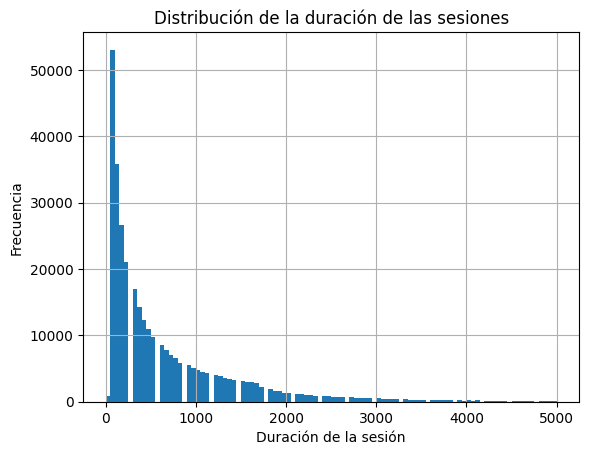

-- La moda de la duración de las sesiones es: 60 segundos


In [24]:
# Se encuentra la diferencia entre el inicio de sesión ('start_ts') y el fin de sesión ('end_ts').
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

# Se valida que la operación se haya realizado correctamente
print(visits.head())
print()

# Se calcula el promedio de la duracion de las sesiones
avg_session_duration = visits['session_duration'].mean()
print(f"-- La duración promedio de cada sesión es: {(avg_session_duration / 60).round(2)} minutos")
print()
# Se visualiza la distribución de las duracióñ de las sesiones. Se crea una variable para visualizar solo las sesiones
# cuya duración es mayor a 0 segundos.
sessions_duration_greater_zero = visits[visits['session_duration'] > 0]
sessions_duration_greater_zero['session_duration'].hist(bins=100, range=(0, 5000))
plt.xlabel('Duración de la sesión')
plt.ylabel('Frecuencia')
plt.title('Distribución de la duración de las sesiones')
plt.show()

# Se observa que la distribución no sigue una dsitribución normal, se calcula la moda de las duración de las sesiones:
print(f"-- La moda de la duración de las sesiones es: {int(sessions_duration_greater_zero['session_duration'].mode().iloc[0])} segundos")

##### Conclusiones
- Se observa que la duración promedio de cada sesión es de 10 minutos aproximadamente. Pero como la distribución de los datos no sigue una distribución normal, nos quedamos con el valor de la moda, que es de *$60$ segundos*.
- Vemos que los usuarios pasan mucho tiempo conectados Y.Afisha

#### ¿Con qué frecuencia los usuarios y las usuarias regresan?

Se quiere determinar la frecuencia con que los usuarios regresan al servicio. Para ello calcula la métrica **sticky factor**.

In [25]:
# Se calcula el sticky factor para la semana
sticky_wau = (dau / wau) * 100

# Se calcula el sticky factor para el mes
sticky_mau = (dau / mau) * 100

print(f"-- El factor de adherencia semanal es: {sticky_wau.iloc[0].round(2)}%")
print(f"-- El factor de adherencia mensual es: {sticky_mau.iloc[0].round(2)}%")

-- El factor de adherencia semanal es: 15.88%
-- El factor de adherencia mensual es: 3.91%


##### Conclusiones

- Se observa un factor de adherencia muy bajo. Esto quiere decir que los usuarios no tienden a regresar al servicio una vez lo han utilizado.

### 2. Ventas:
- ¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).
- ¿Cuántos pedidos hacen durante un período de tiempo dado?
- ¿Cuál es el tamaño promedio de compra?
- ¿Cuánto dinero traen? (`LTV`)

#### ¿Cuándo la gente empieza a comprar? 

- Se quiere determinar cuánto tiempo pasa entre el registro de un usuario y su primera compra.
- Para ello es necesario conocer la fecha de registro de cada usuario en el servicio y la fecha de la primera compra. Para obtener esta información se trabajará con los datasets `'visits'` y `'orders'`.
- Del dataset `'visits'` se obtiene la fecha de registro del usuario.
- Del dataset `'orders'` se obtiene la fecha de la primera orden de cada usuario.

In [26]:
# Se encuentra la fecha del primer pedido de los clientes a partir del dataset 'orders'
# Se agrupa el dataset 'orders' por user id y se encuentra la fecha de su primer pedido
first_order_date_per_user = orders.groupby('uid')['buy_ts'].min()

# Se valida el resultado obtenido
print(f"-- Dataset que contiene la identificación de cada usuario y la fecha de su priemera compra: \
      \n{first_order_date_per_user.head()}")
print()

# se renombra el objeto series obtenido
first_order_date_per_user.name = 'first_order_date'

# Se agrupa el dataset 'visits' por user id y se encuentra la fecha de registro en el servicio.
register_date_per_user = visits.groupby('uid')['start_ts'].min()

# Se valida el resultado obtenido
print(f"-- Dataset que contiene la identificación de cada usuario y la fecha de su registro en el servicio:\
\n\n{register_date_per_user.head()}")
print()

# se renombra el objeto series obtenido
register_date_per_user.name = 'register_date'

# Se agregan los objetos series obtenidos: 'first_order_date' y 'register_date_per_user' con el dataset 'orders'
orders = orders.join(register_date_per_user, on='uid')
orders = orders.join(first_order_date_per_user, on='uid')

# Se valida la operación realizada
print(f"-- Dataset 'orders' con la fecha de registro y la fecha de la primera compra de cada usuario:\
\n\n{orders.head()}")
print()
# Se calcula el tiempo de conversión calculando la diferencia de tiempo entre el registro y la primera compra
orders['conversion_time'] = (orders['first_order_date'] - orders['register_date']).dt.days


print(f"-- Dataset 'orders' con la fecha de registro y la fecha de la primera compra de cada usuario,\
\n y el tiempo de conversión de cada usuario: \n\n{orders.head()}")

-- Dataset que contiene la identificación de cada usuario y la fecha de su priemera compra:       
uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: buy_ts, dtype: datetime64[ns]

-- Dataset que contiene la identificación de cada usuario y la fecha de su registro en el servicio:

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: start_ts, dtype: datetime64[ns]

-- Dataset 'orders' con la fecha de registro y la fecha de la primera compra de cada usuario:

               buy_ts  revenue                   uid       register_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:09:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:14:00   
2 2017-0

##### Distribucón del tiempo de conversión
Se realiza un histograma para ver la distribución del tiempo de conversión de los usuarios.

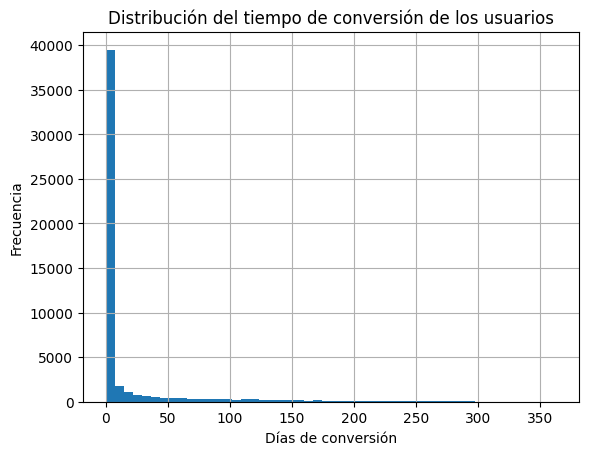

-- Mínimo de días que el usuario espera para comprar: 0
-- Días promedios que el usuario espera para comprar: 17
-- Máximo de días que el usuario espera para comprar: 363
-- Días de espera que más se repite: 0


In [27]:
# Se grafica en un histogrma el tiempo de conversión de los usuarios
orders['conversion_time'].hist(bins=50)
plt.xlabel('Días de conversión')
plt.ylabel('Frecuencia')
plt.title('Distribución del tiempo de conversión de los usuarios')
plt.show()

print(f"-- Mínimo de días que el usuario espera para comprar: {int(orders['conversion_time'].min())}")
print(f"-- Días promedios que el usuario espera para comprar: {int(orders['conversion_time'].mean())}")
print(f"-- Máximo de días que el usuario espera para comprar: {int(orders['conversion_time'].max())}")
print(f"-- Días de espera que más se repite: {int(orders['conversion_time'].mode().iloc[0])}")

##### Conclusiones
- Teniendo en cuenta la distribución de los tiempos de espera de los usuarios para comprar, y el valor de la moda de esta serie de datos, los usuarios realizan su primera orden el mismo día que se registran.

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?
- Se necesita calcular el número de órdenes en un periodo de tiempo dado, para este análisis se elige calcular dicha métrica por mes.
- Del punto anterior tenemos la fecha de la primera compra en la columna `'first_order_date'` del dataset `'orders'`.
- Para obtener los cohortes por mes, es necario extraer el mes de la primera orden, y el mes de cada orden posterior a la primera.

-- Número de órdenes por cohorte: 

cohort_lifetime        0      1      2      3      4      5      6      7   \
first_order_month                                                            
2017-06-01         2354.0  177.0  174.0  226.0  292.0  218.0  276.0  174.0   
2017-07-01         2186.0  100.0  120.0  104.0   72.0   82.0   61.0   50.0   
2017-08-01         1533.0  108.0  100.0   81.0   85.0   62.0   49.0   78.0   
2017-09-01         2933.0  219.0  161.0  164.0   67.0  109.0  108.0   56.0   
2017-10-01         4964.0  314.0  162.0  122.0  129.0  103.0   86.0  125.0   
2017-11-01         4813.0  397.0  182.0  211.0  136.0   59.0  102.0    NaN   
2017-12-01         5052.0  270.0  202.0  179.0   86.0  105.0    NaN    NaN   
2018-01-01         3783.0  224.0  159.0   64.0   78.0    NaN    NaN    NaN   
2018-02-01         4095.0  222.0   83.0   70.0    NaN    NaN    NaN    NaN   
2018-03-01         4130.0  178.0  176.0    NaN    NaN    NaN    NaN    NaN   

cohort_lifetime       8    

<function matplotlib.pyplot.show(close=None, block=None)>

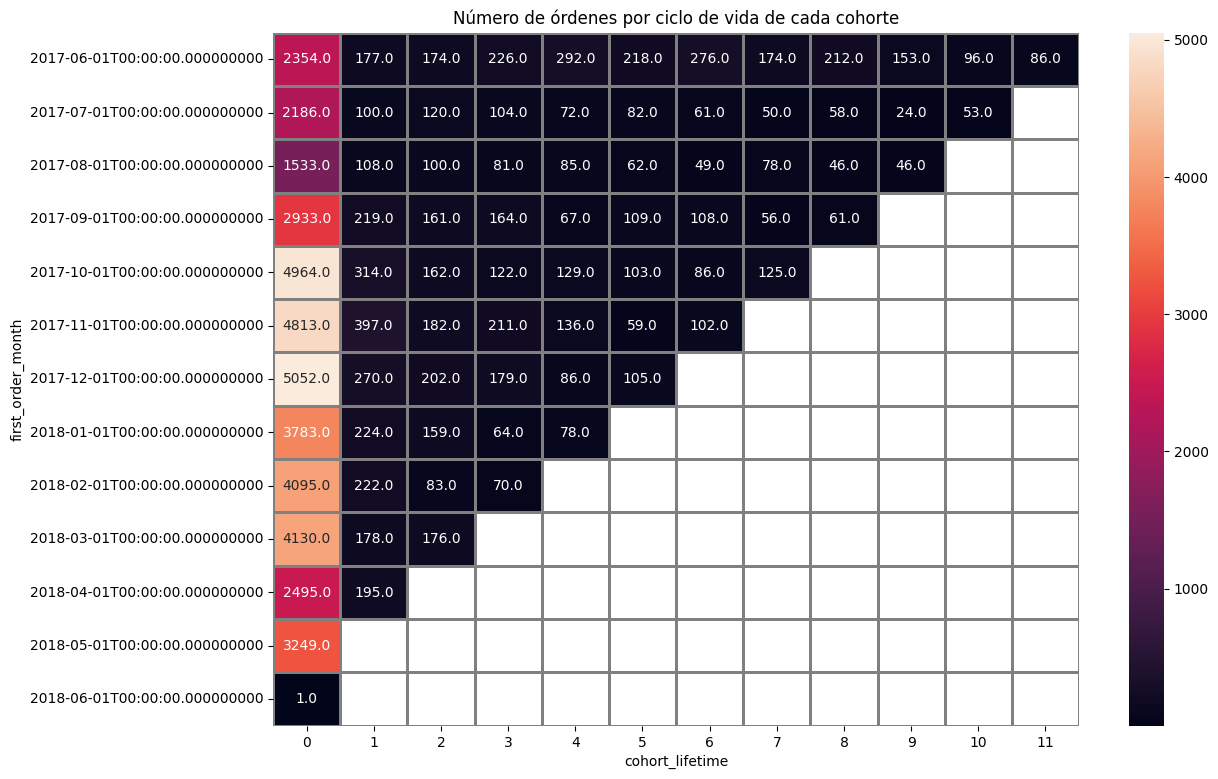

In [28]:
# En el dataset 'orders' obtenemos el mes de la primera orden y el mes de cada orden posterior
orders['order_month'] = orders['buy_ts'].dt.strftime('%Y-%m')
orders['first_order_month'] = orders['first_order_date'].dt.strftime('%Y-%m')

# Se convierte el tipo de datos de las nuevas columnas de 'object' a 'datetime'
orders['first_order_month'] = pd.to_datetime(orders['first_order_month'])
orders['order_month']  = pd.to_datetime(orders['order_month'] )

# Se agrupan las órdenes por mes de la primera orden y mes de una orden y se cuenta el número de usuarios que realizaron una orden
#orders_grouped_by_cohorts = orders.groupby(['first_order_month', 'order_month']).agg({'uid': 'count'})
#orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()

# Se obtienen las cohortes correspondiente a cada mes, así el mes de la primera compra se convierte en la cohorte 0
orders['cohort_lifetime'] = (orders['order_month'] - orders['first_order_month'])
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(30, 'D')
orders['cohort_lifetime'] = (orders['cohort_lifetime'].round().astype('int'))

# Se crea una table dinámica para obtener el número de ventas por cohorte
# Se agrupa por cohorte y se cuenta el número de usuarios que generaron una orden
orders_pivot = orders.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='uid',
    aggfunc='count'
)
orders_pivot.fillna('')

print(f"-- Número de órdenes por cohorte: \n\n{orders_pivot.head(10)}")

# Para una mejor visualización de la información se crea un mapa de calor de las órdenes por cohorte
plt.figure(figsize=(13, 9))
plt.title('Número de órdenes por ciclo de vida de cada cohorte')
sns.heatmap(
    orders_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)
plt.show

##### Conclusiones

- El número de órdenes disminuye rápidamente de una cohorte a otra. Esto quiere decir que los usuarios después que realizan su primera órden no vuelven a realizar una segunda orden. Esto tiene sentido ya que habíamos encontrado un factor de adherencia muy bajo.
- Hubo un pico de órdenes en Diciembre de 2017, esto suguiere que la temporada de navidad incrementó el uso del servicio por parte de los usuarios.

#### ¿Cuál es el tamaño promedio de compra?
- Se pide calcular el promedio del dinero gastado por cada usuario.
- Vamos a calcular esta métrica haciendo uso de cohortes mensuales.

In [29]:
# Se agrupa el dataset 'orders' por cohorte y por el ciclo de vida de cada cohorte, que es una base mensual
# Se suman los datos de la columna 'revenue' y se cuenta el número de usaurios únicos para obtener luego
# el revenue por cada usuario único
orders_revenue_per_cohort = orders.groupby(['first_order_month', 'cohort_lifetime']).agg({'revenue': 'sum', 'uid': 'count'})

print(f"-- Revenue por ciclo de vida de cada cohorte:\n\n{orders_revenue_per_cohort.head(12)}")
print()

# Se renombran las columnas del dataset 'orders_revenue_per_cohort'
orders_revenue_per_cohort.columns = ['total_revenue', 'n_orders']

# Se obtiene el revenue por usuario, apra ello se divide el revenue total entre el número único de usuarios en cada cohorte
orders_revenue_per_cohort['revenue_per_order'] = (orders_revenue_per_cohort['total_revenue'] / orders_revenue_per_cohort['n_orders']).round(2)

print(f"-- Revenue por order y por ciclo de vida de cada cohorte:\n\n{orders_revenue_per_cohort.head(12)}")


-- Revenue por ciclo de vida de cada cohorte:

                                   revenue   uid
first_order_month cohort_lifetime               
2017-06-01        0                9557.49  2354
                  1                 981.82   177
                  2                 885.34   174
                  3                1931.30   226
                  4                2068.58   292
                  5                1487.92   218
                  6                1922.74   276
                  7                1176.56   174
                  8                1119.15   212
                  9                1225.51   153
                  10               1155.66    96
                  11                519.62    86

-- Revenue por order y por ciclo de vida de cada cohorte:

                                   total_revenue  n_orders  revenue_per_order
first_order_month cohort_lifetime                                            
2017-06-01        0                      9557.49   

##### Gasto promedio por ciclo de vida de cada cohorte
- El dataset `'orders_revenue_per_cohort'` contiene la información del gasto de cada usario en cada cohorte, con esta información se puede calcular el revenue promedio por cada usario durante el ciclo de vida de cada cohorte.
- Se creará un mapa de calor para una mejor visualización de la información.

cohort_lifetime      0      1      2      3      4      5      6      7   \
first_order_month                                                          
2017-06-01         4.06   5.55   5.09   8.55   7.08   6.83   6.97   6.76   
2017-07-01         5.29   6.45   9.99   6.64   4.72   3.66   3.79   5.45   
2017-08-01         4.72   5.99   6.28   6.62   7.96   6.27   5.89   7.11   
2017-09-01         4.97  13.17   8.35  62.57  15.43  15.32  16.77  11.21   
2017-10-01         4.37   7.41   5.13   5.59   5.10   5.07   4.28   4.01   
2017-11-01         4.37   4.10   4.47   6.28   4.44   3.73   4.60    NaN   
2017-12-01         4.11   4.23  20.07  26.08  15.95  14.11    NaN    NaN   
2018-01-01         3.69   4.44   6.45   7.52   2.71    NaN    NaN    NaN   
2018-02-01         3.71   4.58   3.45   3.87    NaN    NaN    NaN    NaN   
2018-03-01         4.14   5.97   6.33    NaN    NaN    NaN    NaN    NaN   
2018-04-01         4.25   6.20    NaN    NaN    NaN    NaN    NaN    NaN   
2018-05-01  

<function matplotlib.pyplot.show(close=None, block=None)>

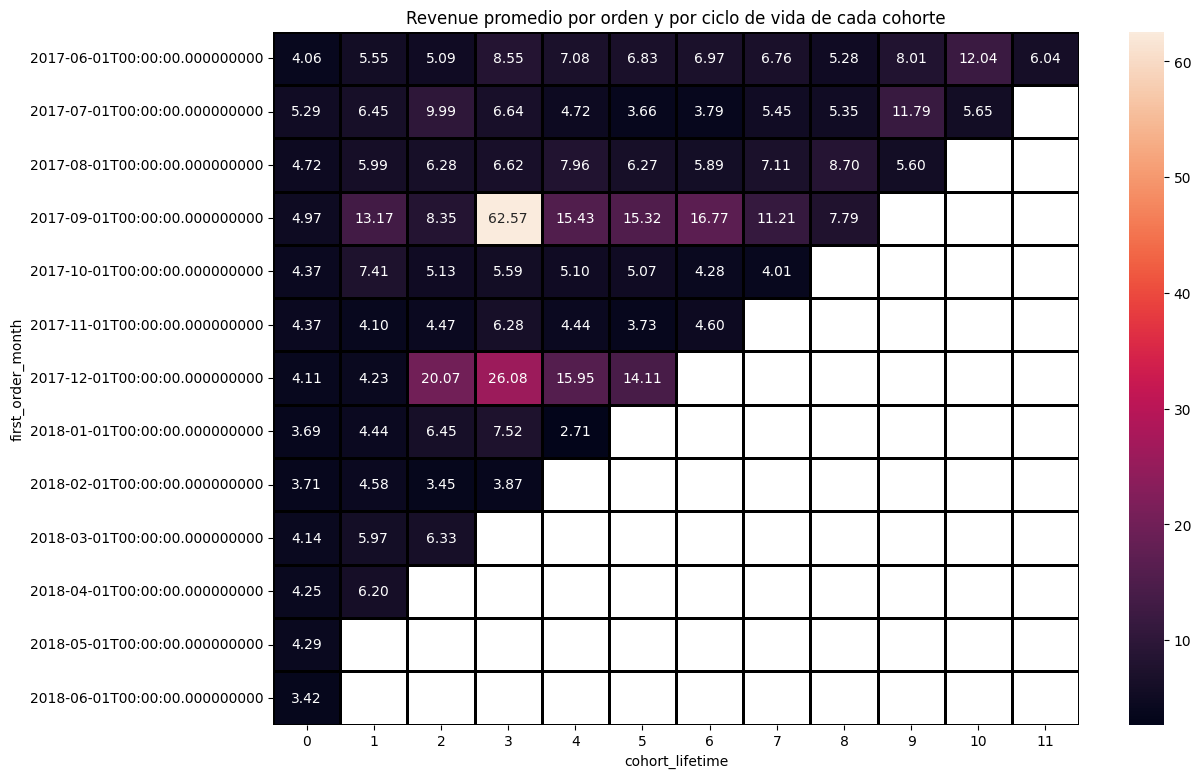

In [30]:
# Se crea una table dinámica con la información de cada cohorte y su ciclo de vida, 
# y se calcula el gasto promedio por orden

revenue_per_cohort = orders_revenue_per_cohort.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_per_order',
    aggfunc='mean'
)
revenue_per_cohort.fillna('')
print(revenue_per_cohort)

# Para una mejor visualización de la información se crea un mapa de calor de revenue promedio por cohorte
plt.figure(figsize=(13, 9))
plt.title('Revenue promedio por orden y por ciclo de vida de cada cohorte')
sns.heatmap(
    revenue_per_cohort,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show

##### Conclusiones
- No se observan cambios drásticos para el revenue promedio por orden durante el primer cohorte.
- Para cada cohorte se observan cambios durante el ciclo de vida. Por ejemplo, las órdenes de la primera cohorte (Junio del 2017) incrementan el revenue promedio a partir del tercer mes del ciclo de vida.
- Destaca el salto en el promedio para la cohorte de Septiembre del 2017 en el tercer mes del ciclo de vida. Parece ser que durante la temporada navideña no escatimaron en gastos.

#### ¿Cuánto dinero traen? (`LTV`)

- Se pide calcular la cantidad total de dinero que el cliente aporta en promedio al utilizar el servicio en un tiempo determinado.
- Se considerará la cantidad total de dinero gastada por ciclo de vida de cada cohorte en una base mensual.
- Para calcular el `LTV` para diferentes cohortes necesitamos:
    1. Encontrar  la fecha de la primera compra de cada cliente: esta información se encuentra en la columna `'first_order_date'` del dataset `'orders'`.
    2. Calcular el número de nuevos clientes para cada mes.
    3. Añadir el mes del primer pedido: esta información se encuentra en la columna `'first_order_month'` del dataset `'orders'`.
    4. Agrupa la tabla y calcular los ingresos.

In [31]:
# Veamos el dataset 'orders'ArithmeticError
print(f"-- Una muestra del dataset 'orders': \n\n{orders.head()}")
print()

# Se calcula el número de usuarios nuevos por cada mes. Para ello se agrupa el dataset 'orders' por el mes de la primera orden
# y se cuenta el número de usuarios únicos.
users_per_cohort = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
users_per_cohort.columns = ['first_order_month', 'n_users']
print(f"-- Número de usuarios nuevos por cohorte: \n\n{users_per_cohort.head()}")
print()

# Se calculan los ingresos por cada cohorte. Se agrupa la tabla 'orders' por mes de la primera orden y por el mes de cada orden
# y se calcula el revenue, también se agrega la información de ciclo de vida de cada cohorte
cohort_revenue = orders.groupby(['first_order_month', 'cohort_lifetime', 'order_month']).agg({'revenue': 'sum'}).reset_index()
print(f"-- Revenue bruto por cohorte: \n\n{cohort_revenue.head()}")
print()

# Agragamos la cantidad de usuarios que realizaron sus primeras compras en cada mes, para ello fusionamos los datos de la tabla
# 'users_per_cohort' con la tabla 'cohort_revenue'
report_ltv = pd.merge(users_per_cohort, cohort_revenue, on='first_order_month')
print(f"-- Revenue bruto y usuario nuevos por cohorte: \n\n{report_ltv.head()}")
print()
# Se calcula el LTV dividiendo el revenue total de cada cohorte entre el número de usuarios de dicha cohorte
report_ltv['ltv'] = report_ltv['revenue'] / report_ltv['n_users']
print(f"-- LTV por cohorte: \n\n{report_ltv.head()}")



-- Una muestra del dataset 'orders': 

               buy_ts  revenue                   uid       register_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:09:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:14:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:25:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:14:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:31:00   

     first_order_date  conversion_time order_month first_order_month  \
0 2017-06-01 00:10:00                0  2017-06-01        2017-06-01   
1 2017-06-01 00:25:00                0  2017-06-01        2017-06-01   
2 2017-06-01 00:27:00                0  2017-06-01        2017-06-01   
3 2017-06-01 00:29:00                0  2017-06-01        2017-06-01   
4 2017-06-01 07:58:00                0  2017-06-01        2017-06-01   

   cohort_lifetime  
0                0  
1                0  
2       

##### LTV por ciclo de vida de cada cohorte
- Se crea una tabla diñamica a partir del dataset `'report'` para visualizar como cambia el LTV para el ciclo de vida de cada cohorte.

-- LTV promedio por ciclo de vida de cada cohortre:

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         4.72  0.49  0.44  0.95  1.02  0.74  0.95  0.58  0.55  0.61   
2017-07-01         6.01  0.34  0.62  0.36  0.18  0.16  0.12  0.14  0.16  0.15   
2017-08-01         5.28  0.47  0.46  0.39  0.49  0.28  0.21  0.41  0.29  0.19   
2017-09-01         5.64  1.12  0.52  3.98  0.40  0.65  0.70  0.24  0.18   NaN   
2017-10-01         5.00  0.54  0.19  0.16  0.15  0.12  0.08  0.12   NaN   NaN   
2017-11-01         5.15  0.40  0.20  0.32  0.15  0.05  0.11   NaN   NaN   NaN   
2017-12-01         4.74  0.26  0.93  1.07  0.31  0.34   NaN   NaN   NaN   NaN   
2018-01-01         4.14  0.29  0.30  0.14  0.06   NaN   NaN   NaN   NaN   NaN   
2018-02-01         4.16  0.28  0.08  0.07   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         4.84  0.30  0.32   NaN   NaN   NaN   

<function matplotlib.pyplot.show(close=None, block=None)>

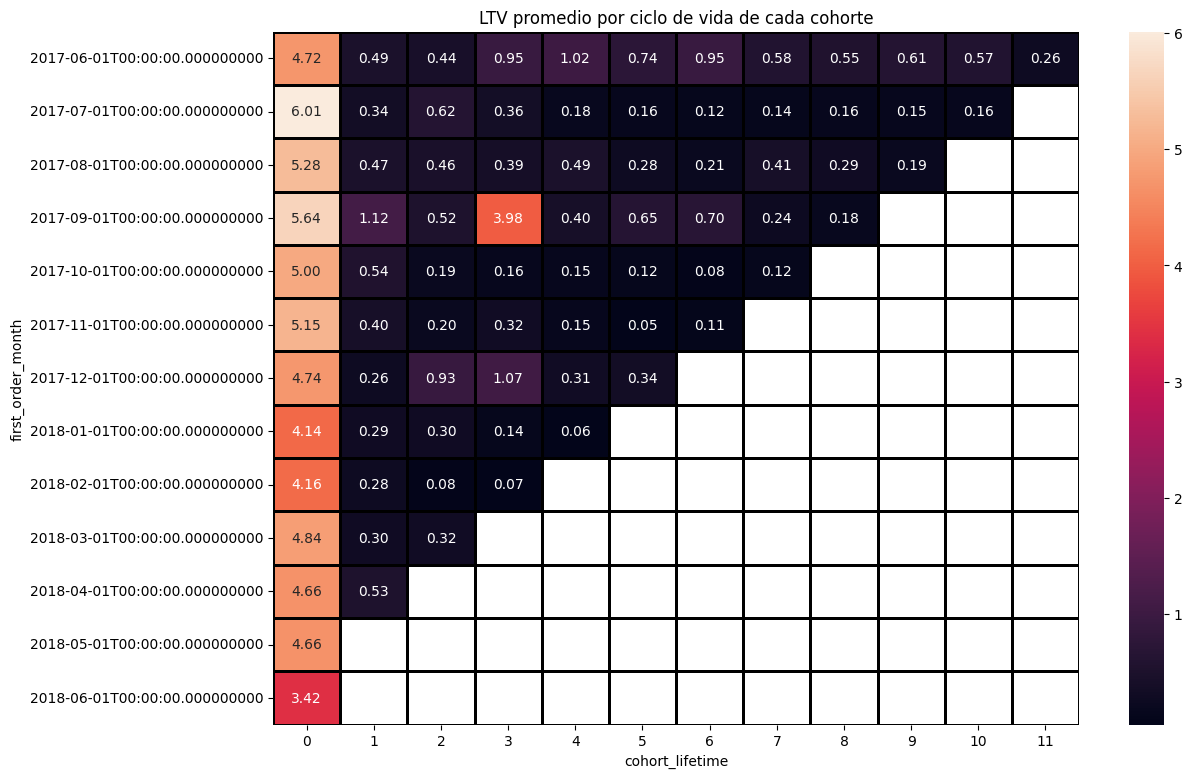

In [32]:
# Se crea una tabla pivot a partir del dataset 'report'
output_ltv = report_ltv.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='ltv',
    aggfunc='mean'
).round(2)
output_ltv.fillna('')

print(f"-- LTV promedio por ciclo de vida de cada cohortre:\n\n{output_ltv}")
print()

# Se crea un mapa de calor para una mejor visualización de los datos
plt.figure(figsize=(13, 9))
plt.title('LTV promedio por ciclo de vida de cada cohorte')
sns.heatmap(
    output_ltv,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show

##### LTV acumulado por cada cohorte durante el ciclo de vida
- Se calcula la suma acumulada del `LTV` para cada cohorte, durante todo el ciclo de vida.

-- LTV acumulado por ciclo de vida de cada cohorte: 

    cohort_lifetime  ltv_cumulative
0                 0             4.8
1                 1             5.4
2                 2             5.8
3                 3             6.7
4                 4             7.3
5                 5             8.0
6                 6             8.4
7                 7             9.1
8                 8            10.1
9                 9             9.3
10               10            10.0
11               11            11.9


/tmp/ipykernel_60652/2671314765.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




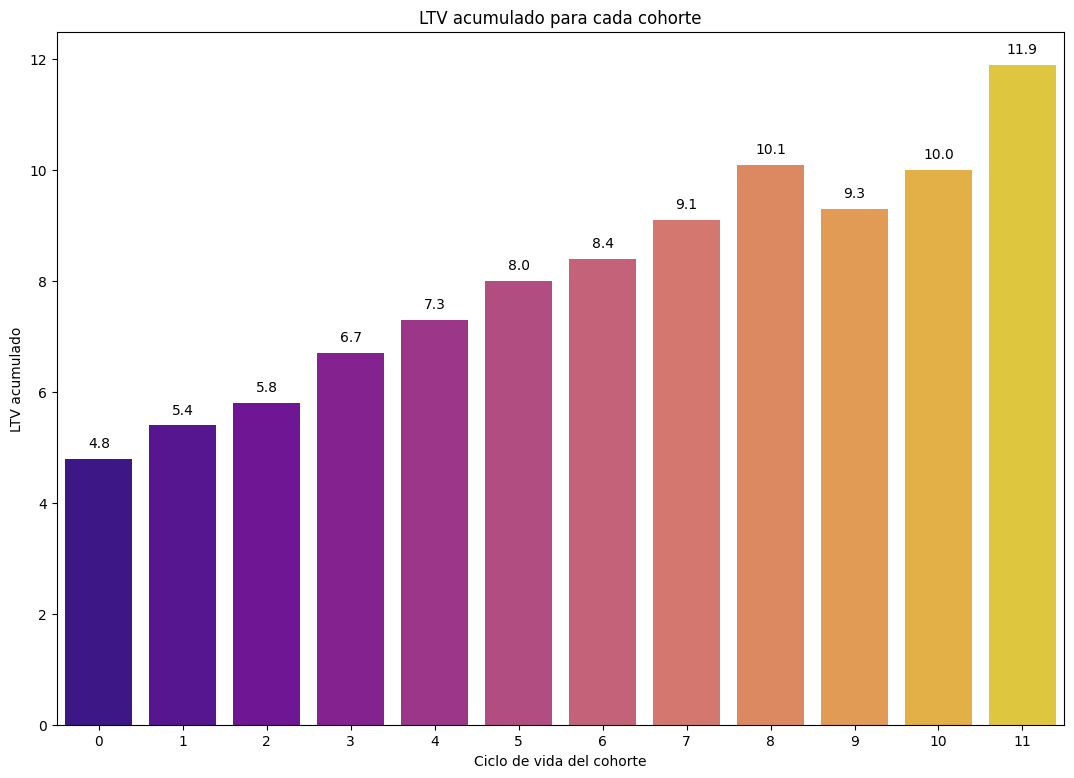

In [33]:
# Se calcula la suma del LTV para cada indice de la tabla 'output', cada índice de dicha tabla corresponde a una cohorte
ltv_cumulative = output_ltv.cumsum(axis=1).mean(axis=0).round(1).reset_index()
ltv_cumulative.columns = ['cohort_lifetime', 'ltv_cumulative']
print(f"-- LTV acumulado por ciclo de vida de cada cohorte: \n\n{ltv_cumulative}")

plt.figure(figsize=(13,9))
fig = sns.barplot(data=ltv_cumulative, x='cohort_lifetime', y='ltv_cumulative', palette='plasma')
plt.title('LTV acumulado para cada cohorte',fontsize=12)
plt.xlabel('Ciclo de vida del cohorte')
plt.ylabel('LTV acumulado')
for i, v in enumerate(ltv_cumulative['ltv_cumulative']):
                      plt.text(i, v + 0.15, str(v), ha='center', va='bottom')
plt.show()


##### Conclusiones
- El `LTV` para cada cohorte es similar para el primer ciclo de vida, luego se presenta una caída en el revenue promedio por usuario.
- Los usuarios del primer y cuarto cohorte tienen un revenue mayor a lo largo del ciclo de vida, en comparación a los usuarios de los otros cohortes.
- EL `LTV` acumulado muestra crecimiento a través del ciclo de vida de cada cohorte.
- Toca calcular el ROMI para determinar si este nivel de revenue por usuario es consistente para el servicio.

### 3. Marketing:
- ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
- ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
- ¿Cuán rentables eran las inversiones? (`ROMI`)

#### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
- Se trabajará con el dataset `'costs_marketing'`.
- Se calculará el costo total en marketing, el costo total por cada fuente de anuncios.

-- El costo total en marketing es: $329,131.62

-- Costo total de marketing, y porcentaje del gasto total, por fuente de anuncio::

   source_id      costs    percent
0          3  141321.63  42.937725
1          4   61073.60  18.555981
2          5   51757.10  15.725350
3          2   42806.04  13.005751
4          1   20833.27   6.329769
5         10    5822.49   1.769046
6          9    5517.49   1.676378


/tmp/ipykernel_60652/987020906.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




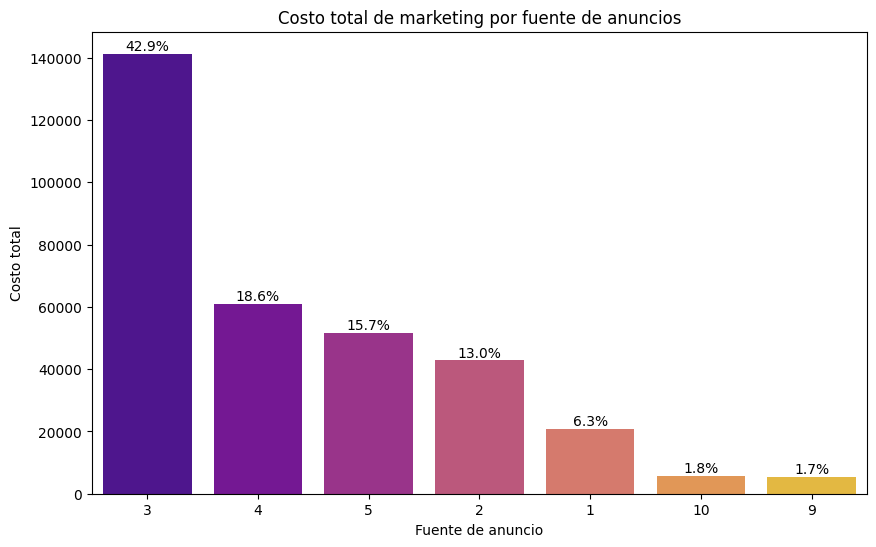

In [34]:
# Se calcula el cosot total del marketing
costs_marketing_total = costs_marketing['costs'].sum()
print(f"-- El costo total en marketing es: ${costs_marketing_total:,.2f}")
print()

# Se calcula el costo total por cada fuente de anuncios
costs_marketing_per_source = (costs_marketing.groupby('source_id').agg({'costs': 'sum'})).sort_values(by='costs', ascending=False).reset_index()
costs_marketing_per_source['percent'] = (costs_marketing_per_source['costs'] / costs_marketing_total) * 100

print(f"-- Costo total de marketing, y porcentaje del gasto total, por fuente de anuncio::\n\n{costs_marketing_per_source}")

# Se muestra el costo por fuente de anuncios en un gráfico de barras
plt.figure(figsize=(10,6))
source = sns.barplot(data=costs_marketing_per_source, x='source_id', y='costs', palette='plasma', \
                     order=costs_marketing_per_source['source_id'])
for i, v in enumerate(costs_marketing_per_source['costs']):
    percent = (v / costs_marketing_total) * 100
    plt.text(i, v + 0.2, f"{percent:.1f}%", ha='center', va='bottom')
plt.title('Costo total de marketing por fuente de anuncios',fontsize=12)
plt.xlabel('Fuente de anuncio')
plt.ylabel('Costo total')
plt.show()



##### Costo del marketing por fuente de anuncio por mes
- Se obtiene el mes del gasto en marketing y luego se agrupa para obenter el gasto por mes y por fuente de anuncio.

-- Costo total de marketing por mes: 

        month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27

-- Costo total de marketing por mes y por fuente del anuncio:

       month source_id    costs
0 2017-06-01         1  1125.61
1 2017-06-01         2  2427.38
2 2017-06-01         3  7731.65
3 2017-06-01         4  3514.80
4 2017-06-01         5  2616.12
5 2017-06-01         9   285.22
6 2017-06-01        10   314.22


/tmp/ipykernel_60652/3852412412.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




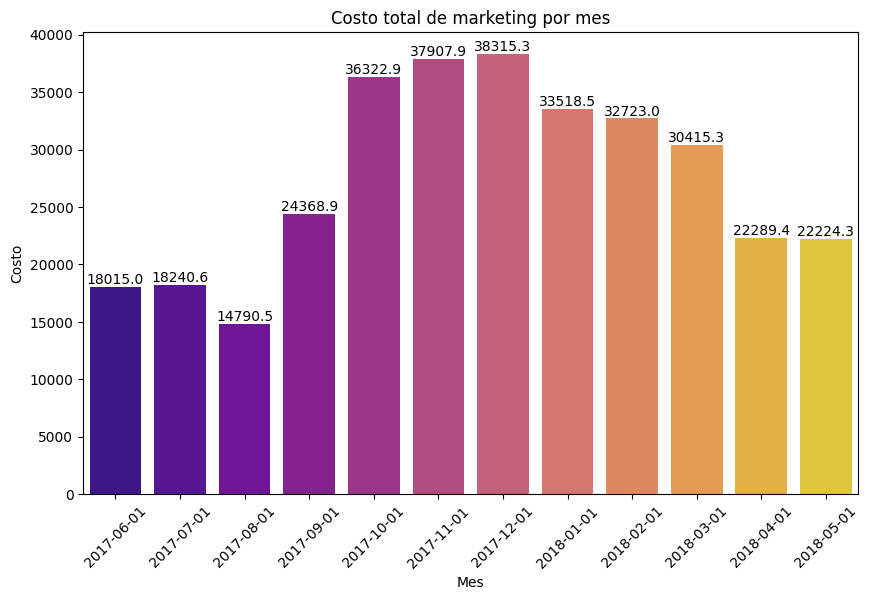

In [52]:
# Se obtiene el mes del gasto del dataset 'costs_marketing'
costs_marketing['month'] = pd.to_datetime(costs_marketing['dt'].dt.strftime('%Y-%m'), format='%Y-%m')

costs_marketing_per_month = costs_marketing.groupby(by='month').agg({'costs': 'sum'}).reset_index()
costs_marketing_per_month['month'] = pd.to_datetime(costs_marketing_per_month['month'])

print(f"-- Costo total de marketing por mes: \n\n{costs_marketing_per_month}")
print()

# Veamos ahora el gasto por mes y por fuente de anuncios
costs_marketing_per_month_per_source = costs_marketing.groupby(['month', 'source_id']).agg({'costs': 'sum'}).reset_index()
costs_marketing_per_month_per_source['source_id'] = costs_marketing_per_month_per_source['source_id'].astype('str')
print(f"-- Costo total de marketing por mes y por fuente del anuncio:\n\n{costs_marketing_per_month_per_source.head(7)}")

# Se muestra el gasto por mes en un gráfico de barras
plt.figure(figsize=(10,6))
source = sns.barplot(data=costs_marketing_per_month, x='month', y='costs', palette='plasma')
for i, v in enumerate(costs_marketing_per_month['costs']):
    plt.text(i, v, f"{v:.1f}", ha='center', va='bottom')
plt.xticks(rotation=45)
plt.title('Costo total de marketing por mes',fontsize=12)
plt.xlabel('Mes')
plt.ylabel('Costo')
plt.show()

# Se muestra el gasto por mes y por fuente de anuncio en un gráfico de barras
fig = px.bar(costs_marketing_per_month_per_source,
                     x = 'month',
                     y = 'costs',
                     color = 'source_id',
                     title = 'Costo total de marketing por mes y por fuente del anuncio',
                     labels = {'month': 'Mes', 'costs': 'Costo'}
                     )
fig.show()



##### Conclusiones
- La fuente de anuncios $3$ se lleva la mayor parte del presuepuesto total de marketing, y se observa que a lo largo del tiempo es la que mas inversión tiene.
- Los últimos 3 meses del año y los primeros 3, son los meses en que más se invierte en marketing.

#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
- Se pide calcular la métrica `CAC` costo de adquisición de clientes.
- Se obtiene el número de usuarios únicos por fuente de anuncio del dataset `'visits'`.
- Se cuenta con el costo de marketing por cada fuente de anuncios; esta información esta almacenada en el dataframe `'costs_marketing_per_source'`.
- Se combina la información del costo de marjeting por cada fuente de anuncios, con la información de la cantidad de usuarios por fuente de anuncios.


-- Cantidad de usuarios por cada fuente de anuncio: 

   source_id  n_users
0          1    18999
1          2    26245
2          3    74756
3          4    83525
4          5    56974
5          6        6
6          7       34
7          9     9264
8         10     8067



-- Costo de marketing por cada fuente de anuncio: 

   source_id      costs    percent
0          3  141321.63  42.937725
1          4   61073.60  18.555981
2          5   51757.10  15.725350
3          2   42806.04  13.005751
4          1   20833.27   6.329769
5         10    5822.49   1.769046
6          9    5517.49   1.676378
   source_id  n_users      costs    percent
0          1    18999   20833.27   6.329769
1          2    26245   42806.04  13.005751
2          3    74756  141321.63  42.937725
3          4    83525   61073.60  18.555981
4          5    56974   51757.10  15.725350
5          6        6        NaN        NaN
6          7       34        NaN        NaN
7          9     9264    5517.49   1.676378
8         10     8067    5822.49   1.769046

-- CAC para cada fuente de anuncios: 

   source_id      costs  n_users   cac
5          6        NaN        6  0.00
6          7        NaN       34  0.00
7          9    5517.49     9264  0.60
8         10    5822.49     8067

/tmp/ipykernel_60652/3437112371.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




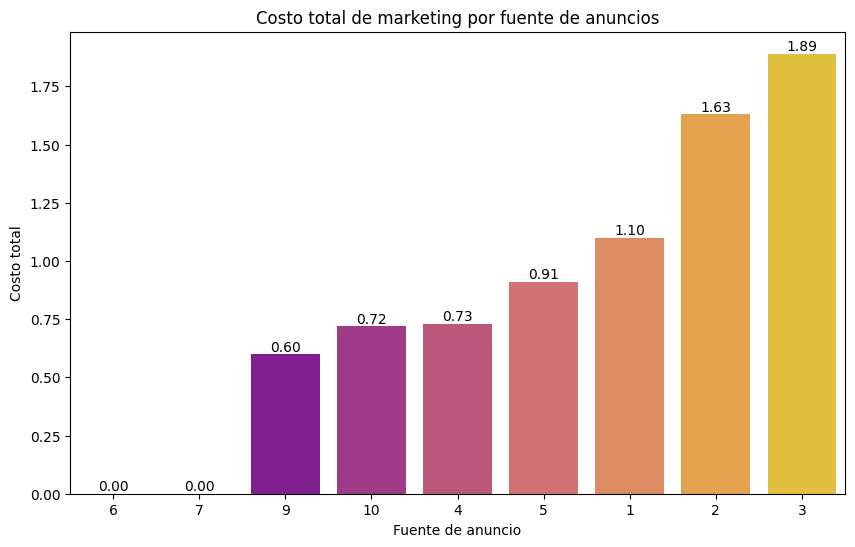

In [53]:
# Se agrupa el dataset 'visits' por fuente de anuncio y se cuentan los usuarios únicos para cada fuente
user_per_source = visits.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
user_per_source.columns = ['source_id', 'n_users']
print(f"-- Cantidad de usuarios por cada fuente de anuncio: \n\n{user_per_source}")
print()

# Número de usuarios por fuente de anuncio

users_bars = px.bar(user_per_source,
                     x = 'source_id',
                     y = 'n_users',
                     color = 'source_id',
                     title = 'Número de usuarios por fuente de anuncios',
                     labels = {'source_id': 'Fuente de anuncio', 'n_users': 'Número de usuarios'}
                         )

users_bars.show()


print(f"-- Costo de marketing por cada fuente de anuncio: \n\n{costs_marketing_per_source}")

# se fusionan los dos datasets
report_cac = user_per_source.merge(costs_marketing_per_source, how='left', on='source_id')
print(report_cac)
print()

# Se calcula el CAC dividiendo el costo de cada fuente de marketing entre la cantidad de usuarios para cada fuente
# se redondea el resultado a dos cifra decimales y se completan los valores ausentes con 0
# se ordena el dataset por el valor de 'cac'
report_cac['cac'] = (report_cac['costs'] / report_cac['n_users']).round(2).fillna(0)
report_cac = report_cac.sort_values(by='cac')
print(f"-- CAC para cada fuente de anuncios: \n\n{report_cac[['source_id', 'costs', 'n_users', 'cac']]}")
print()

# Se muestra el CAC en un gráfico de barras
plt.figure(figsize=(10,6))
source = sns.barplot(data=report_cac, x='source_id', y='cac', palette='plasma', \
                     order=report_cac['source_id'])
for i, v in enumerate(report_cac['cac']):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')  # Se muestra el valor de la variable en la parte superior de la barra
plt.title('Costo total de marketing por fuente de anuncios',fontsize=12)
plt.xlabel('Fuente de anuncio')
plt.ylabel('Costo total')
plt.show()

##### Conclusiones
- Las fuentes de anuncios más económicas en términos de costo por usuario son las fuentes: *9, 10, 4, 5*. El costo por usuario es de menos de $\$1\, USD$.
- La fuente de anuncio *3* es las más costosa en términos de costo por usuario.

#### ¿Cuán rentables eran las inversiones? (ROMI)
- El retorno de la inversión en marketing `ROMI` (por sus siglas en inlglés), se calcula dividiendo el `LTV` por el `CAC`.
- Es necesario calcular el `LTV` para cada fuente de anuncio.
- También se tiene el `CAC` calculado anteriormente, esta información está guardad en el dataframe `'costs_marketing_per_source'`.
- Se fusionan estos dos dataframe y se calcula el `ROMI`.

-- Una muestra de los usuarios del dataframe:

               uid   device              end_ts  source_id  \
0   11863502262781    touch 2018-03-01 17:33:00          3   
1   49537067089222    touch 2018-02-06 15:57:00          2   
2  297729379853735  desktop 2017-06-07 18:48:00          3   
3  313578113262317  desktop 2017-09-18 23:07:00          2   
4  325320750514679  desktop 2017-09-30 14:38:00          5   

             start_ts  visits_year  visits_month  visits_week visits_date  \
0 2018-03-01 17:27:00         2018             3            9  2018-03-01   
1 2018-02-06 15:55:00         2018             2            6  2018-02-06   
2 2017-06-07 18:47:00         2017             6           23  2017-06-07   
3 2017-09-18 22:49:00         2017             9           38  2017-09-18   
4 2017-09-30 14:29:00         2017             9           39  2017-09-30   

   session_duration  
0               360  
1               120  
2                60  
3              1080  
4      

<function matplotlib.pyplot.show(close=None, block=None)>

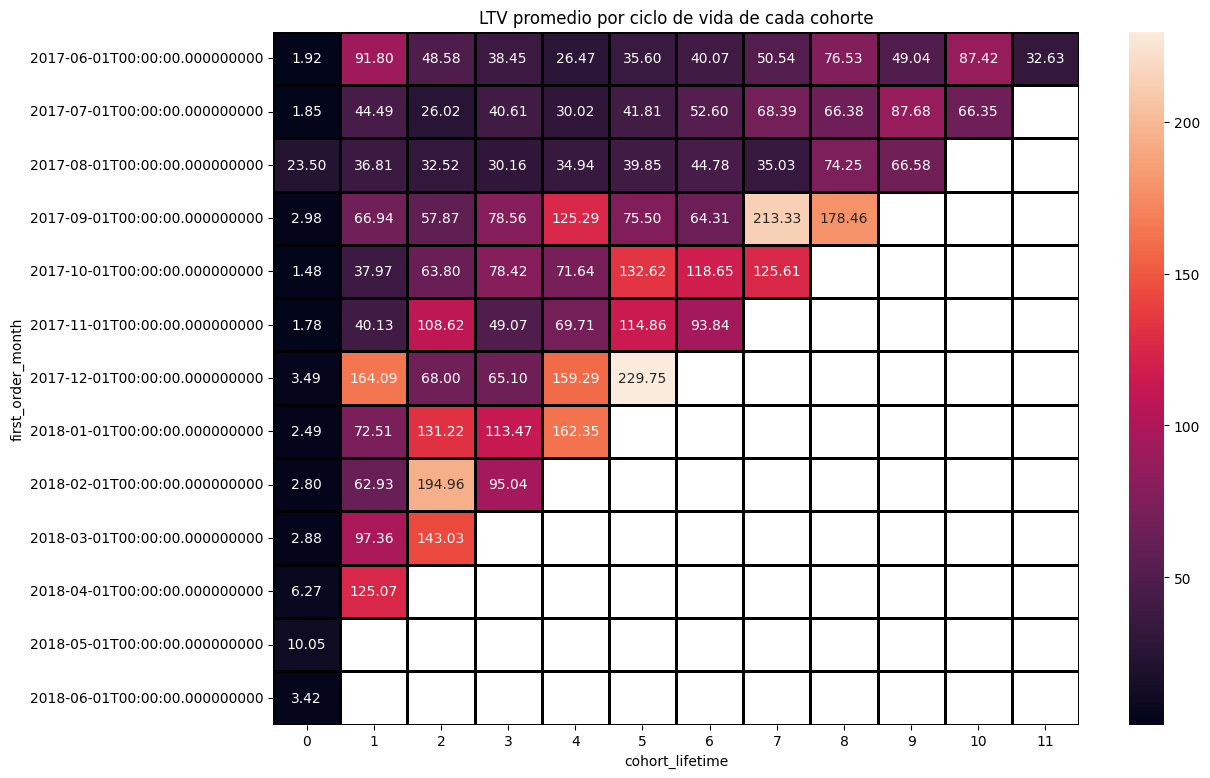

In [56]:
# Par calcular el LTV por cada fuente de anuncio, se obtiene la información del origen de cada usuario, de la
# primera visita y se fusiona con la información de la tabla 'orders'.
user_source_id_start = visits.sort_values('start_ts',ascending=True).groupby('uid').first().reset_index()
print(f"-- Una muestra de los usuarios del dataframe:\n\n{user_source_id_start.head(5)}")
print()

# Se fusiona con el dataframe orders
orders = orders.merge(user_source_id_start[['uid', 'source_id']], on=['uid'], how='left')
print(f"-- Una muestra de las órdenes, con el source id del anuncio:\n\n{orders.head()}")
print()

# Se obtiene la cantidad de usuarios nuevos por cohorte y por fuente de asuario
user_per_cohort_source = orders.groupby(['first_order_month', 'cohort_lifetime', 'source_id']).agg({'uid': 'nunique'}).reset_index()
user_per_cohort_source.columns = ['first_order_month', 'cohort_lifetime', 'source_id', 'n_users']
print(f"-- Usarios nuevos por cohorte y por fuente de anuncio:\n\n{user_per_cohort_source.head()}")
print()

# Se obtiene el revenue de cada usuario por cohorte y por fuente de anuncio
cohort_revenue = orders.groupby(['first_order_month', 'cohort_lifetime', 'source_id']).agg({'revenue': 'sum'})
print(cohort_revenue)
ltv_per_source = pd.merge(user_per_cohort_source, cohort_revenue, on='first_order_month')
print(f"-- Revenue de usuario por cohorte y por fuente de anuncio:\n\n{ltv_per_source.head()}")
print()

# Se calcula el LTV para cada usuario
ltv_per_source['ltv'] = ltv_per_source['revenue'] / ltv_per_source['n_users']
print(f"-- LTV para cada usuario:\n\n{ltv_per_source.head()}")
print()

# Se calcula el LTV general
ltv_per_source_pivot = ltv_per_source.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='ltv',
    aggfunc='mean'
)
ltv_per_source_pivot.fillna('')

print(f"-- LTV por fuente de anuncio:\n\n{ltv_per_source_pivot.head()}")
print()

# Se crea un mapa de calor para una mejor visualización de los datos
plt.figure(figsize=(13, 9))
plt.title('LTV promedio por ciclo de vida de cada cohorte')
sns.heatmap(
    ltv_per_source_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show



###### Calculo del  ROMI 

In [57]:
# Para calcular el ROMI se fusionan los datasets 'ltv_per_source', que contiene la información del 'ltv'
# por usuario y por fuente de anuncio, cn el dataset 'cost_marketing_per_source', que contiene información
# del costo por cada fuente de anuncio
print(ltv_per_source.head())
print()
print(costs_marketing_per_source.head())
print()


report_romi = pd.merge(ltv_per_source, costs_marketing_per_source[['source_id','costs']], on='source_id')
print(f"-- LTV y costo por fuente de anuncio:\n\n{report_romi.head()}")
print()

# Con los costos de cada fuente de anuncio y la cantidad de usaurios nuevos por fuente,
# se calcula el CAC
report_romi['cac'] = report_romi['costs'] / report_romi['n_users']
print(f"-- Información del LTV y el CAC por cohorte y fuente de anuncio:\n\n{report_romi.head()}")
print()

# Con los datos del 'ltv' y del 'cac' se procede a calcular el 'romi'
report_romi['romi'] = report_romi['ltv'] / report_romi['cac']
print(f"-- Información del ROMI por cohorte y por fuente de anuncio:\n\n{report_romi.head()}")
print()


  first_order_month  cohort_lifetime  source_id  n_users  revenue        ltv
0        2017-06-01                0          1      190  1378.70   7.256316
1        2017-06-01                0          1      190  1043.68   5.493053
2        2017-06-01                0          1      190  2804.34  14.759684
3        2017-06-01                0          1      190  1959.84  10.314947
4        2017-06-01                0          1      190  1898.89   9.994158

   source_id      costs    percent
0          3  141321.63  42.937725
1          4   61073.60  18.555981
2          5   51757.10  15.725350
3          2   42806.04  13.005751
4          1   20833.27   6.329769

-- LTV y costo por fuente de anuncio:

  first_order_month  cohort_lifetime  source_id  n_users  revenue        ltv  \
0        2017-06-01                0          1      190  1378.70   7.256316   
1        2017-06-01                0          1      190  1043.68   5.493053   
2        2017-06-01                0          1

###### ROMI para la fuente de anuncio `'9'`

-- Informacíon del 'romi' para la fuente de anuncio '9':

      first_order_month  cohort_lifetime  source_id  n_users  revenue  \
21286        2017-06-01                0          9       68  1378.70   
21287        2017-06-01                0          9       68  1043.68   
21288        2017-06-01                0          9       68  2804.34   
21289        2017-06-01                0          9       68  1959.84   
21290        2017-06-01                0          9       68  1898.89   

             ltv    costs        cac      romi  
21286  20.275000  5517.49  81.139559  0.249878  
21287  15.348235  5517.49  81.139559  0.189158  
21288  41.240294  5517.49  81.139559  0.508264  
21289  28.821176  5517.49  81.139559  0.355205  
21290  27.924853  5517.49  81.139559  0.344158  

-- Variación del ROMI por cohorte:

cohort_lifetime          0         1         2         3         4         5   \
first_order_month                                                               
2017-06-01

<function matplotlib.pyplot.show(close=None, block=None)>

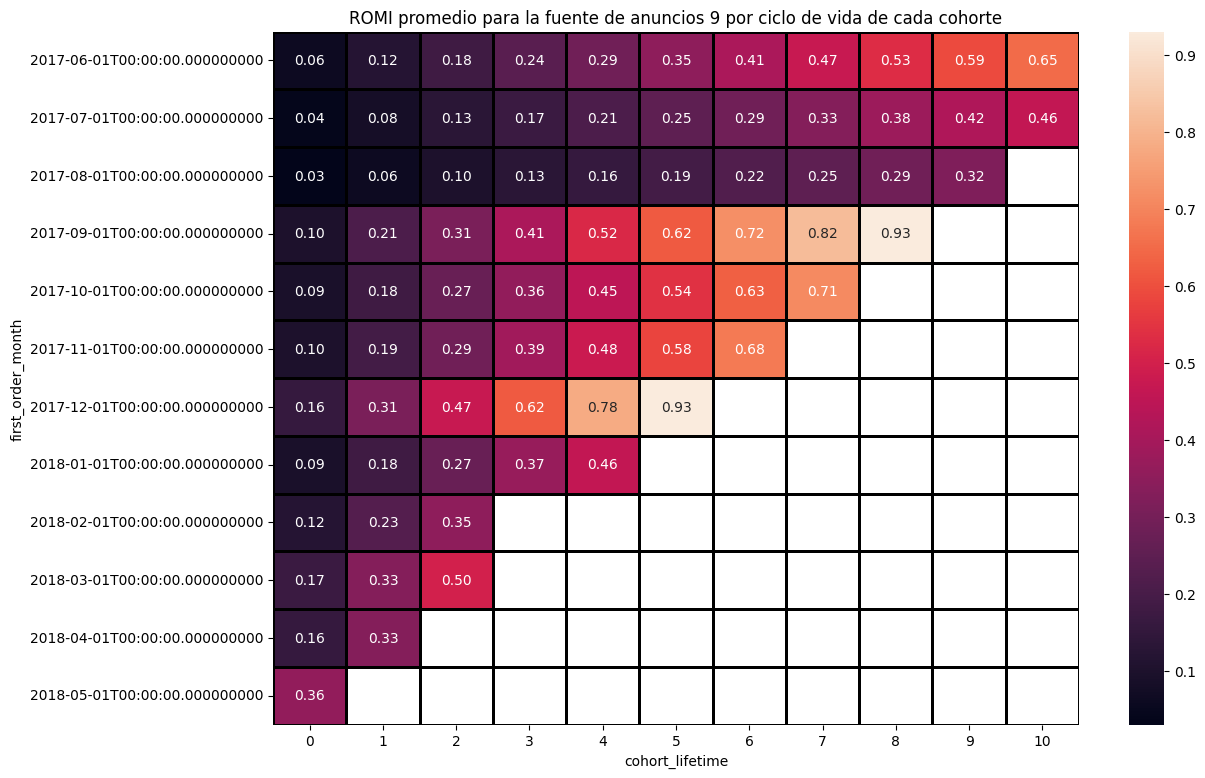

In [58]:
# Del dataset 'report_romi' se  filtra la inforamción para la fuente de anuncio 9
romi_source_9 = report_romi[report_romi['source_id'] == 9]
print(f"-- Informacíon del 'romi' para la fuente de anuncio '9':\n\n{romi_source_9.head()}")
print()

# Se calcula el 'romi' por cohorte
romi_source_9_pivot = romi_source_9.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='romi',
    aggfunc='mean'
)

romi_cumulative = romi_source_9_pivot.cumsum(axis=1).round(2)
romi_cumulative.fillna('')
print(f"-- Variación del ROMI por cohorte:\n\n{romi_source_9_pivot}")

# Se crea un mapa de calor para una mejor visualización de los datos
plt.figure(figsize=(13, 9))
plt.title('ROMI promedio para la fuente de anuncios 9 por ciclo de vida de cada cohorte')
sns.heatmap(
    romi_cumulative,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show

###### ROMI para la fuente de anuncio `'10'`

-- Informacíon del 'romi' para la fuente de anuncio '10':

      first_order_month  cohort_lifetime  source_id  n_users  revenue  \
25443        2017-06-01                0         10       95  1378.70   
25444        2017-06-01                0         10       95  1043.68   
25445        2017-06-01                0         10       95  2804.34   
25446        2017-06-01                0         10       95  1959.84   
25447        2017-06-01                0         10       95  1898.89   

             ltv    costs        cac      romi  
25443  14.512632  5822.49  61.289368  0.236789  
25444  10.986105  5822.49  61.289368  0.179250  
25445  29.519368  5822.49  61.289368  0.481639  
25446  20.629895  5822.49  61.289368  0.336598  
25447  19.988316  5822.49  61.289368  0.326130  

-- Variación del ROMI por cohorte:

cohort_lifetime           0         1         2         3         4         5  \
first_order_month                                                               
2017-06-0

<function matplotlib.pyplot.show(close=None, block=None)>

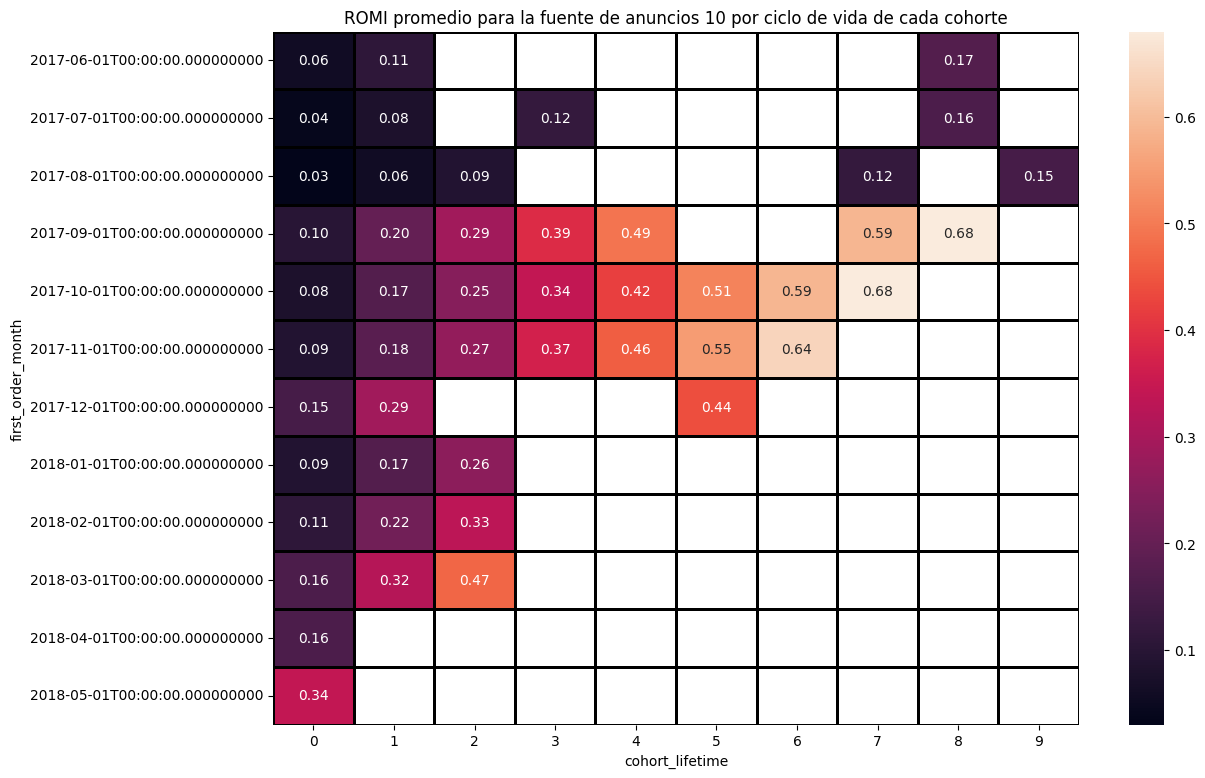

In [59]:
# Del dataset 'report_romi' se  filtra la inforamción para la fuente de anuncio 10
romi_source_10 = report_romi[report_romi['source_id'] == 10]
print(f"-- Informacíon del 'romi' para la fuente de anuncio '10':\n\n{romi_source_10.head()}")
print()

# Se calcula el 'romi' por cohorte
romi_source_10_pivot = romi_source_10.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='romi',
    aggfunc='mean'
)

romi_cumulative = romi_source_10_pivot.cumsum(axis=1).round(2)
romi_cumulative.fillna('')
print(f"-- Variación del ROMI por cohorte:\n\n{romi_source_10_pivot}")

# Se crea un mapa de calor para una mejor visualización de los datos
plt.figure(figsize=(13, 9))
plt.title('ROMI promedio para la fuente de anuncios 10 por ciclo de vida de cada cohorte')
sns.heatmap(
    romi_cumulative,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show

###### ROMI para la fuente de anuncio `'4'`

-- Informacíon del 'romi' para la fuente de anuncio '4':

      first_order_month  cohort_lifetime  source_id  n_users  revenue  \
12771        2017-06-01                0          4      413  1378.70   
12772        2017-06-01                0          4      413  1043.68   
12773        2017-06-01                0          4      413  2804.34   
12774        2017-06-01                0          4      413  1959.84   
12775        2017-06-01                0          4      413  1898.89   

            ltv    costs         cac      romi  
12771  3.338257  61073.6  147.877966  0.022574  
12772  2.527070  61073.6  147.877966  0.017089  
12773  6.790169  61073.6  147.877966  0.045917  
12774  4.745375  61073.6  147.877966  0.032090  
12775  4.597797  61073.6  147.877966  0.031092  

-- Variación del ROMI por cohorte:

cohort_lifetime          0         1         2         3         4         5   \
first_order_month                                                               
2017-06-01

<function matplotlib.pyplot.show(close=None, block=None)>

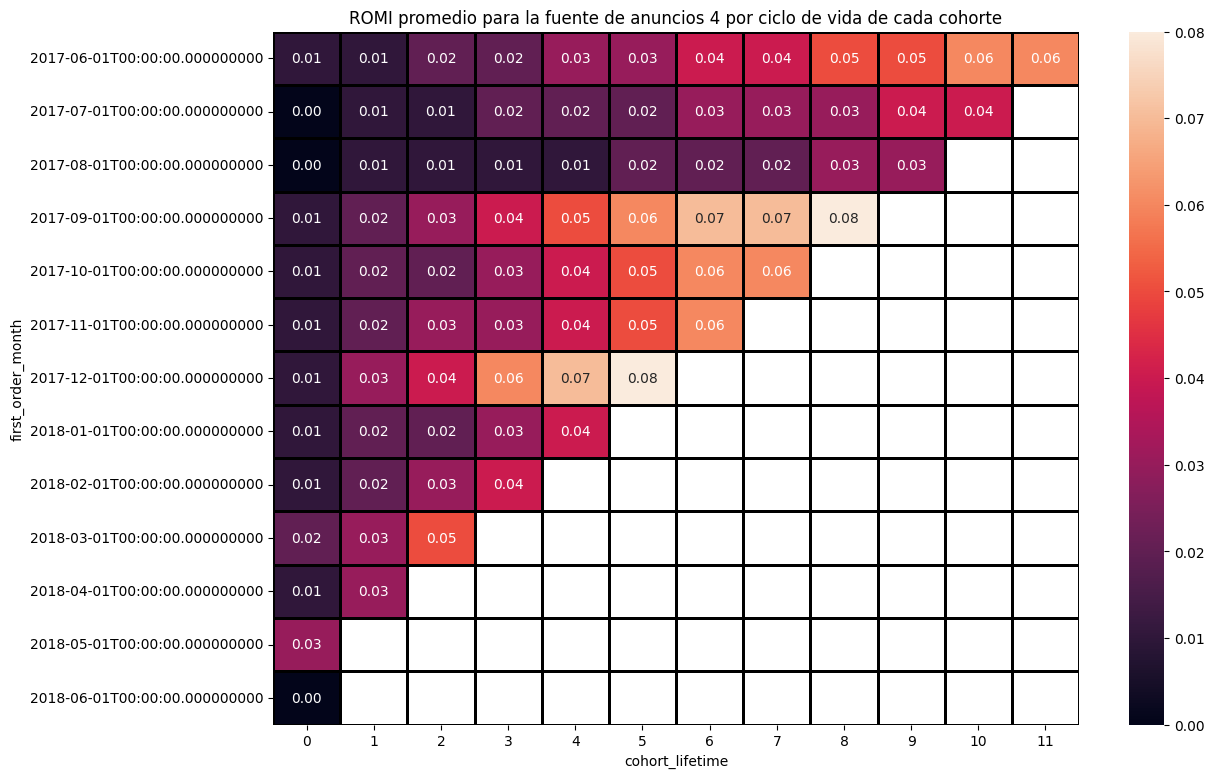

In [60]:
# Del dataset 'report_romi' se  filtra la inforamción para la fuente de anuncio 4
romi_source_4 = report_romi[report_romi['source_id'] == 4]
print(f"-- Informacíon del 'romi' para la fuente de anuncio '4':\n\n{romi_source_4.head()}")
print()

# Se calcula el 'romi' por cohorte
romi_source_4_pivot = romi_source_4.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='romi',
    aggfunc='mean'
)

romi_cumulative = romi_source_4_pivot.cumsum(axis=1).round(2)
romi_cumulative.fillna('')
print(f"-- Variación del ROMI por cohorte:\n\n{romi_source_4_pivot}")

# Se crea un mapa de calor para una mejor visualización de los datos
plt.figure(figsize=(13, 9))
plt.title('ROMI promedio para la fuente de anuncios 4 por ciclo de vida de cada cohorte')
sns.heatmap(
    romi_cumulative,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show

###### ROMI para la fuente de anuncio `'5'`

-- Informacíon del 'romi' para la fuente de anuncio '5':

      first_order_month  cohort_lifetime  source_id  n_users  revenue  \
17029        2017-06-01                0          5      384  1378.70   
17030        2017-06-01                0          5      384  1043.68   
17031        2017-06-01                0          5      384  2804.34   
17032        2017-06-01                0          5      384  1959.84   
17033        2017-06-01                0          5      384  1898.89   

            ltv    costs         cac      romi  
17029  3.590365  51757.1  134.784115  0.026638  
17030  2.717917  51757.1  134.784115  0.020165  
17031  7.302969  51757.1  134.784115  0.054183  
17032  5.103750  51757.1  134.784115  0.037866  
17033  4.945026  51757.1  134.784115  0.036688  

-- Variación del ROMI por cohorte:

cohort_lifetime          0         1         2         3         4         5   \
first_order_month                                                               
2017-06-01

<function matplotlib.pyplot.show(close=None, block=None)>

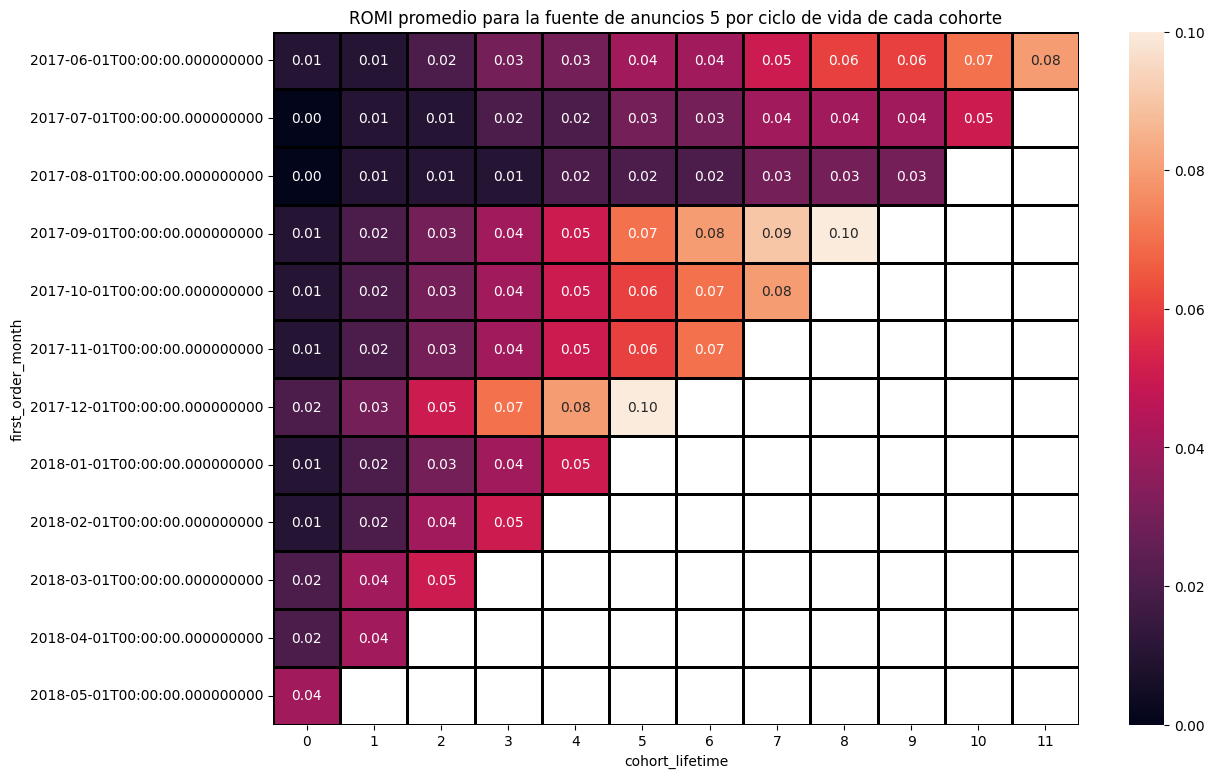

In [61]:
# Del dataset 'report_romi' se  filtra la inforamción para la fuente de anuncio 5
romi_source_5 = report_romi[report_romi['source_id'] == 5]
print(f"-- Informacíon del 'romi' para la fuente de anuncio '5':\n\n{romi_source_5.head()}")
print()

# Se calcula el 'romi' por cohorte
romi_source_5_pivot = romi_source_5.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='romi',
    aggfunc='mean'
)

romi_cumulative = romi_source_5_pivot.cumsum(axis=1).round(2)
romi_cumulative.fillna('')
print(f"-- Variación del ROMI por cohorte:\n\n{romi_source_5_pivot}")

# Se crea un mapa de calor para una mejor visualización de los datos
plt.figure(figsize=(13, 9))
plt.title('ROMI promedio para la fuente de anuncios 5 por ciclo de vida de cada cohorte')
sns.heatmap(
    romi_cumulative,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show

###### ROMI para la fuente de anuncio `'1'`

-- Informacíon del 'romi' para la fuente de anuncio '1':

  first_order_month  cohort_lifetime  source_id  n_users  revenue        ltv  \
0        2017-06-01                0          1      190  1378.70   7.256316   
1        2017-06-01                0          1      190  1043.68   5.493053   
2        2017-06-01                0          1      190  2804.34  14.759684   
3        2017-06-01                0          1      190  1959.84  10.314947   
4        2017-06-01                0          1      190  1898.89   9.994158   

      costs         cac      romi  
0  20833.27  109.648789  0.066178  
1  20833.27  109.648789  0.050097  
2  20833.27  109.648789  0.134609  
3  20833.27  109.648789  0.094073  
4  20833.27  109.648789  0.091147  

-- Variación del ROMI por cohorte:

cohort_lifetime          0         1         2         3         4         5   \
first_order_month                                                               
2017-06-01         0.015588  0.015588  0.01558

<function matplotlib.pyplot.show(close=None, block=None)>

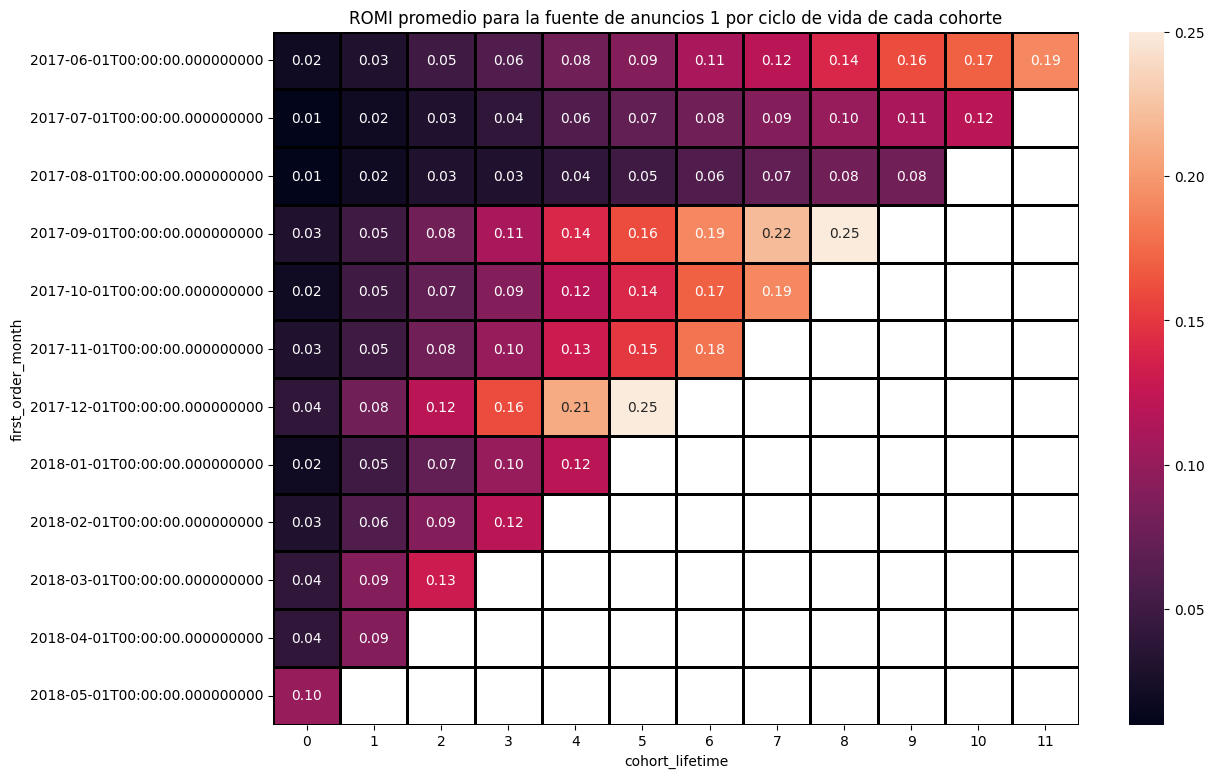

In [62]:
# Del dataset 'report_romi' se  filtra la inforamción para la fuente de anuncio 1
romi_source_1 = report_romi[report_romi['source_id'] == 1]
print(f"-- Informacíon del 'romi' para la fuente de anuncio '1':\n\n{romi_source_1.head()}")
print()

# Se calcula el 'romi' por cohorte
romi_source_1_pivot = romi_source_1.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='romi',
    aggfunc='mean'
)

romi_cumulative = romi_source_1_pivot.cumsum(axis=1).round(2)
romi_cumulative.fillna('')
print(f"-- Variación del ROMI por cohorte:\n\n{romi_source_1_pivot}")

# Se crea un mapa de calor para una mejor visualización de los datos
plt.figure(figsize=(13, 9))
plt.title('ROMI promedio para la fuente de anuncios 1 por ciclo de vida de cada cohorte')
sns.heatmap(
    romi_cumulative,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show

###### ROMI para la fuente de anuncio `'2'`

-- Informacíon del 'romi' para la fuente de anuncio '2':

     first_order_month  cohort_lifetime  source_id  n_users  revenue  \
4257        2017-06-01                0          2      235  1378.70   
4258        2017-06-01                0          2      235  1043.68   
4259        2017-06-01                0          2      235  2804.34   
4260        2017-06-01                0          2      235  1959.84   
4261        2017-06-01                0          2      235  1898.89   

            ltv     costs         cac      romi  
4257   5.866809  42806.04  182.153362  0.032208  
4258   4.441191  42806.04  182.153362  0.024382  
4259  11.933362  42806.04  182.153362  0.065513  
4260   8.339745  42806.04  182.153362  0.045784  
4261   8.080383  42806.04  182.153362  0.044360  

-- Variación del ROMI por cohorte:

cohort_lifetime          0         1         2         3         4         5   \
first_order_month                                                               
2017-06-01

<function matplotlib.pyplot.show(close=None, block=None)>

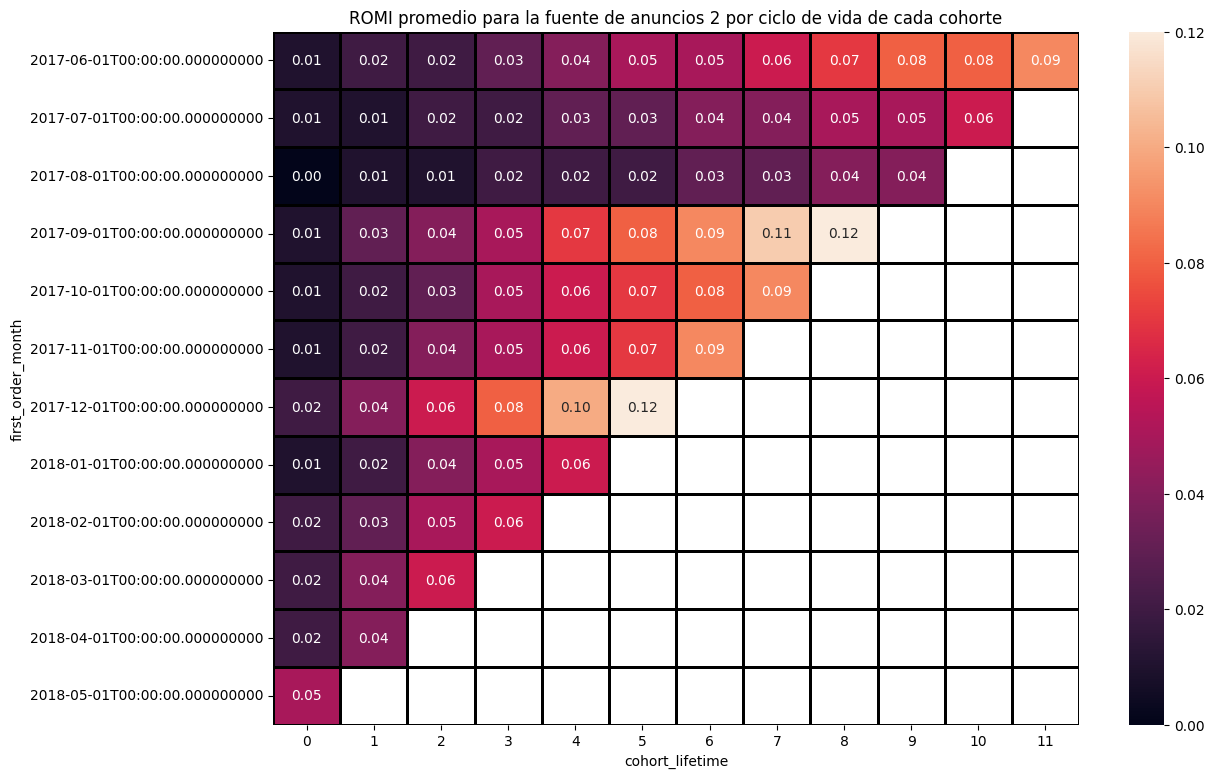

In [63]:
# Del dataset 'report_romi' se  filtra la inforamción para la fuente de anuncio 2
romi_source_2 = report_romi[report_romi['source_id'] == 2]
print(f"-- Informacíon del 'romi' para la fuente de anuncio '2':\n\n{romi_source_2.head()}")
print()

# Se calcula el 'romi' por cohorte
romi_source_2_pivot = romi_source_2.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='romi',
    aggfunc='mean'
)

romi_cumulative = romi_source_2_pivot.cumsum(axis=1).round(2)
romi_cumulative.fillna('')
print(f"-- Variación del ROMI por cohorte:\n\n{romi_source_2_pivot}")

# Se crea un mapa de calor para una mejor visualización de los datos
plt.figure(figsize=(13, 9))
plt.title('ROMI promedio para la fuente de anuncios 2 por ciclo de vida de cada cohorte')
sns.heatmap(
    romi_cumulative,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show

###### ROMI para la fuente de anuncio `'3'`

-- Informacíon del 'romi' para la fuente de anuncio '3':

     first_order_month  cohort_lifetime  source_id  n_users  revenue  \
8514        2017-06-01                0          3      638  1378.70   
8515        2017-06-01                0          3      638  1043.68   
8516        2017-06-01                0          3      638  2804.34   
8517        2017-06-01                0          3      638  1959.84   
8518        2017-06-01                0          3      638  1898.89   

           ltv      costs         cac      romi  
8514  2.160972  141321.63  221.507257  0.009756  
8515  1.635862  141321.63  221.507257  0.007385  
8516  4.395517  141321.63  221.507257  0.019844  
8517  3.071850  141321.63  221.507257  0.013868  
8518  2.976317  141321.63  221.507257  0.013437  

-- Variación del ROMI por cohorte:

cohort_lifetime          0         1         2         3         4         5   \
first_order_month                                                               
2017-06-01

<function matplotlib.pyplot.show(close=None, block=None)>

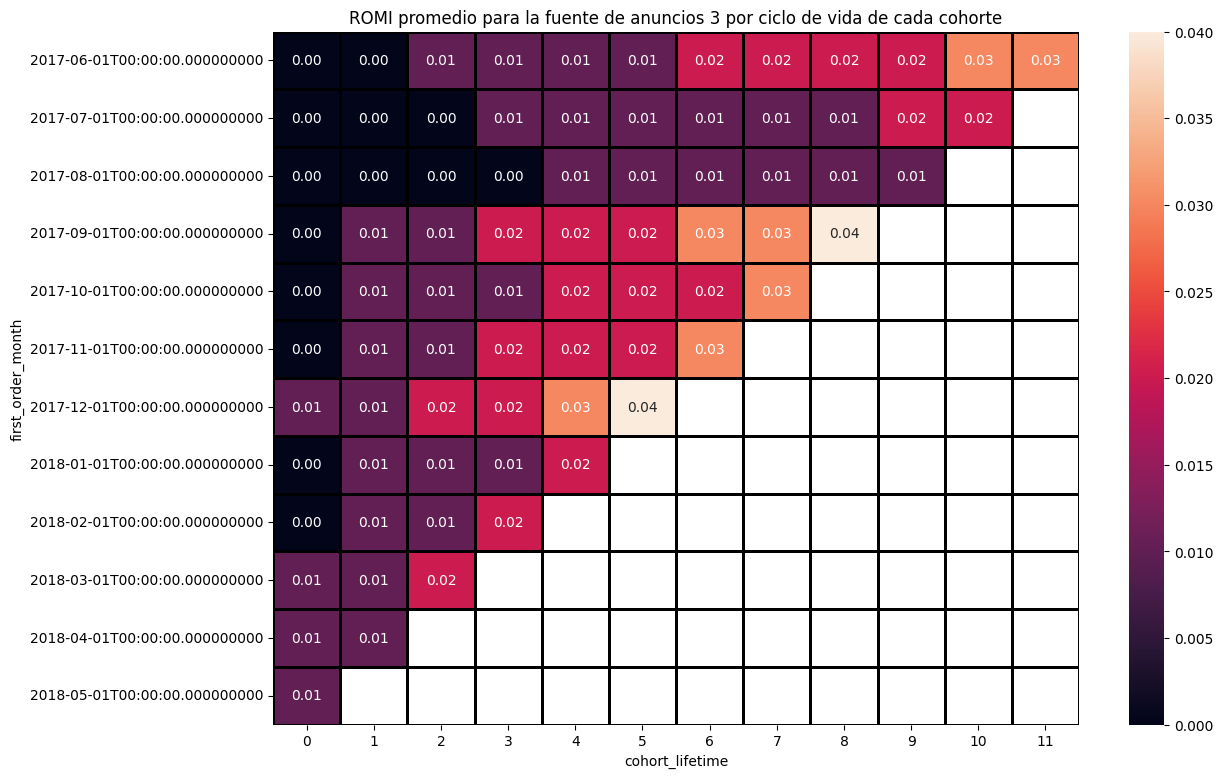

In [64]:
# Del dataset 'report_romi' se  filtra la inforamción para la fuente de anuncio 3
romi_source_3 = report_romi[report_romi['source_id'] == 3]
print(f"-- Informacíon del 'romi' para la fuente de anuncio '3':\n\n{romi_source_3.head()}")
print()

# Se calcula el 'romi' por cohorte
romi_source_3_pivot = romi_source_3.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='romi',
    aggfunc='mean'
)

romi_cumulative = romi_source_3_pivot.cumsum(axis=1).round(2)
romi_cumulative.fillna('')
print(f"-- Variación del ROMI por cohorte:\n\n{romi_source_3_pivot}")

# Se crea un mapa de calor para una mejor visualización de los datos
plt.figure(figsize=(13, 9))
plt.title('ROMI promedio para la fuente de anuncios 3 por ciclo de vida de cada cohorte')
sns.heatmap(
    romi_cumulative,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show

##### ROMI promedio por ciclo de vida de cada cohorte
- Esta métrica nos permite calcular cuan rápido se recupera la inversión en marketing.

/tmp/ipykernel_60652/4247878323.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




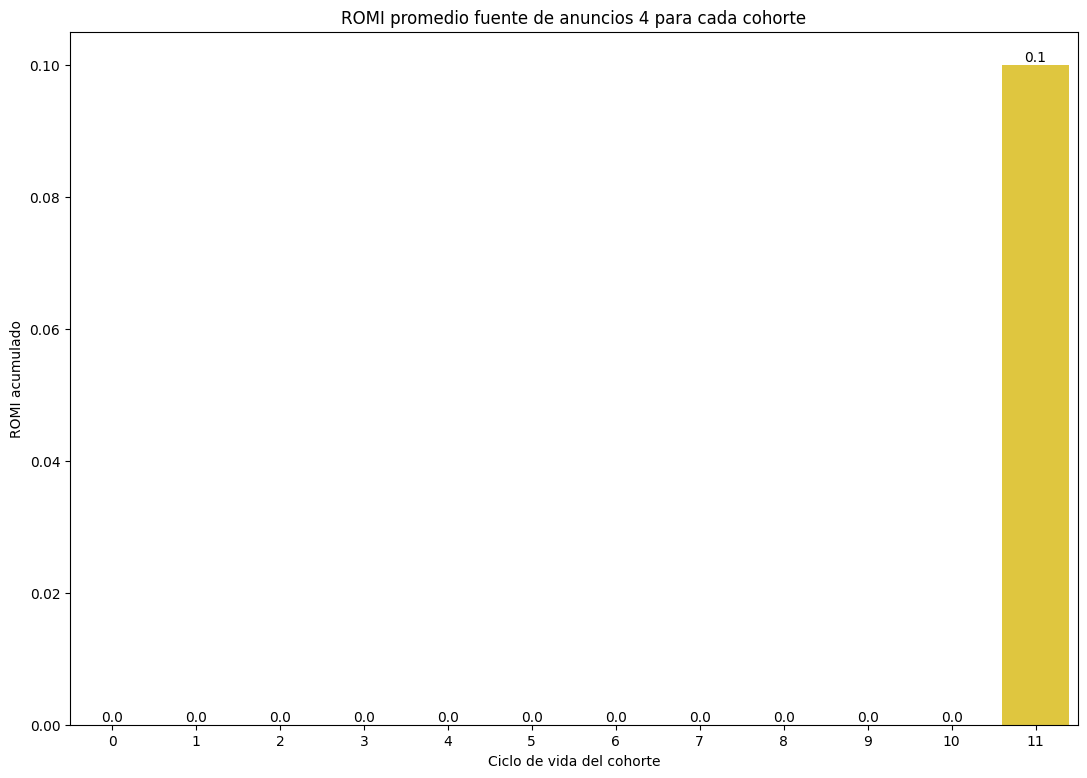

/tmp/ipykernel_60652/4247878323.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




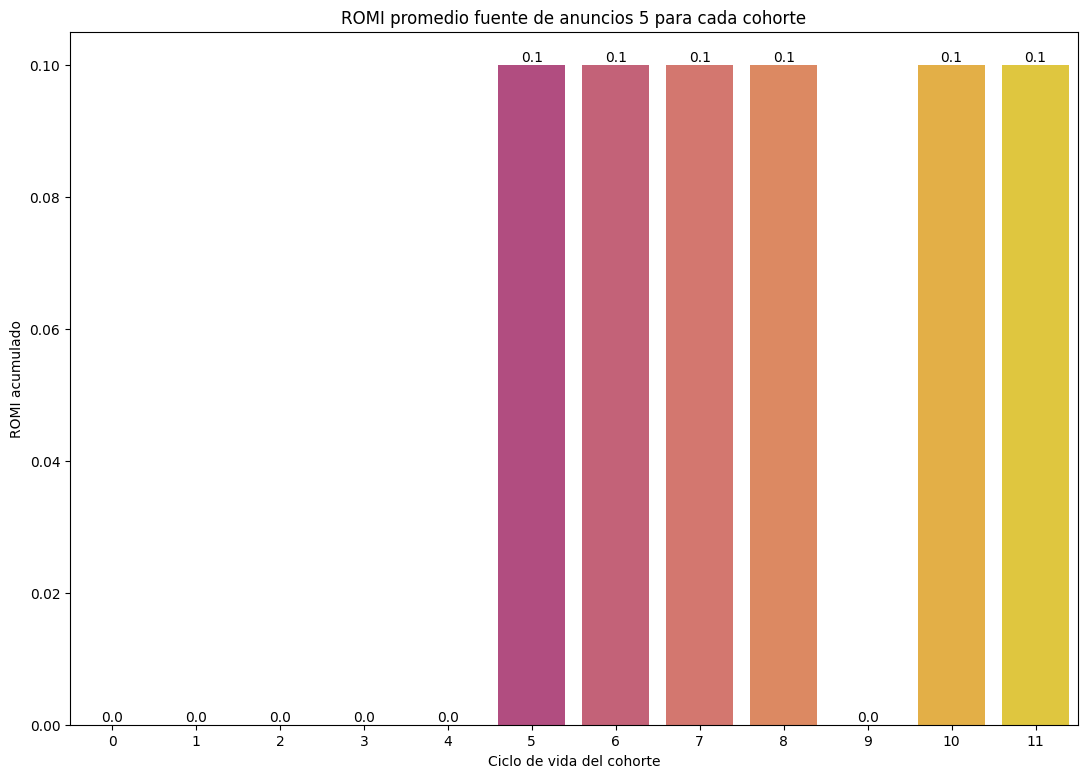

/tmp/ipykernel_60652/4247878323.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




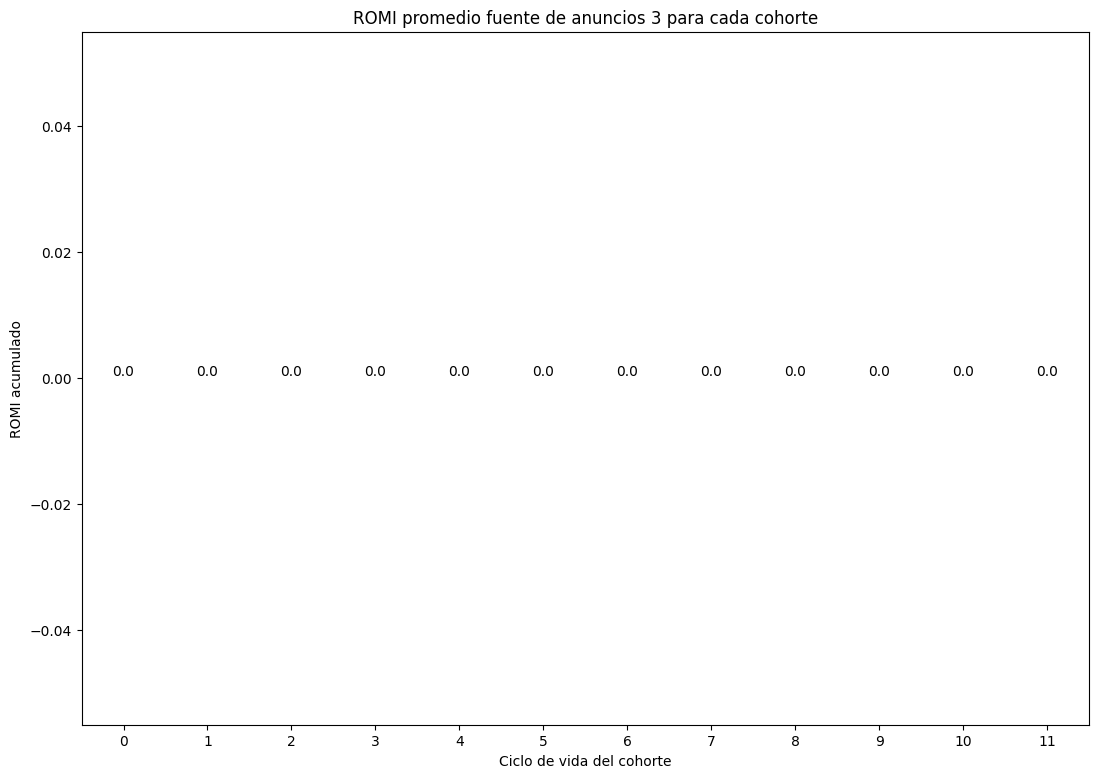

In [65]:
romi_cumulative_4 = romi_source_4_pivot.cumsum(axis=1).mean(axis=0).round(1).reset_index()
romi_cumulative_4.columns = ['cohort_lifetime', 'cumulative_romi']

plt.figure(figsize=(13,9))
fig = sns.barplot(data=romi_cumulative_4, x='cohort_lifetime', y='cumulative_romi', palette='plasma')
plt.title('ROMI promedio fuente de anuncios 4 para cada cohorte',fontsize=12)
plt.xlabel('Ciclo de vida del cohorte')
plt.ylabel('ROMI acumulado')
#plt.xticks(rotation=45)
for i, v in enumerate(romi_cumulative_4['cumulative_romi']):
                      plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

romi_cumulative_5 = romi_source_5_pivot.cumsum(axis=1).mean(axis=0).round(1).reset_index()
romi_cumulative_5.columns = ['cohort_lifetime', 'cumulative_romi']

plt.figure(figsize=(13,9))
fig = sns.barplot(data=romi_cumulative_5, x='cohort_lifetime', y='cumulative_romi', palette='plasma')
plt.title('ROMI promedio fuente de anuncios 5 para cada cohorte',fontsize=12)
plt.xlabel('Ciclo de vida del cohorte')
plt.ylabel('ROMI acumulado')
#plt.xticks(rotation=45)
for i, v in enumerate(romi_cumulative_5['cumulative_romi']):
                      plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

romi_cumulative_3 = romi_source_3_pivot.cumsum(axis=1).mean(axis=0).round(1).reset_index()
romi_cumulative_3.columns = ['cohort_lifetime', 'cumulative_romi']

plt.figure(figsize=(13,9))
fig = sns.barplot(data=romi_cumulative_3, x='cohort_lifetime', y='cumulative_romi', palette='plasma')
plt.title('ROMI promedio fuente de anuncios 3 para cada cohorte',fontsize=12)
plt.xlabel('Ciclo de vida del cohorte')
plt.ylabel('ROMI acumulado')
#plt.xticks(rotation=45)
for i, v in enumerate(romi_cumulative_3['cumulative_romi']):
                      plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

##### Conclusiones
- A peser de que el `LTV` arroja buenos resultados, se encuentra que los ingresos no son suficientes para compensar las inversiones.
- A la luz de los nuevos resultados se encuentra que las inversiones en las fuentes de anuncios no son rentables.
- Esto implica que toca replantear la estrategia de marketing..


## Paso 3. Conclusiones y recomendaciones finales

Después de los análisis de visitas, ventas y marketing realizados, se recomienda al departamente de marketing lo siguiente:
- En promedio 987 usuario ingresan al servicio una vez por día, y pasan al rededor de $60\,segundos$ conectados, pero se encontró que los usuarios no retornan al servicio, este es un punto en el que hay que trabajar, y tratar de descubrir el bajo nivel de adherencia al servicio.
- Las ventas son consistentes y el `LTV` crece durante el ciclo de vida de las cohortes. Pero hay varios problemas que abordar. Primero que los usuarios después que realizan su primera compra no vuelven a realizar una segunda o tercera compra. Segundo, se observa una estacionalidad en el número de órdenes, hay que tratar de fomentar el uso del servicio en las temporadas bajas.
- La mayor inversión en marketying ocurre en los meses de Octubre, Noviembre, Diciembre, Enero, Febrero y Marzo. Se recomienda invertir más en los meses de temporada baja.
- Se recomienda redistribuir la inversión en las fuentes de anuncios. Se econtró que la fuente de *anuncios 3* representa el $42\,\%$ de la inversión en marketing, si bien tiene una buena cantidad de usuarios originados $(74756)$, también es cierto que es la mas costosa en términos de costo por usuario $(\$\,1.89\,usd)$.
- Para la redistribución del gasto de marketing se recomienda aumentar la inversión en las fuente de *anuncios 4 y 5*, estas fuentes de anuncios atraen una gran cantidad de usuarios, y tienen un costo de menos de $(\$\,1\,usd)$ por usuario.
- Las inversiones en las fuentes de anuncios no son rentables, es necesario replantear toda la estrategia de marketing.